# Forecasting Nutrition Support: Reducing Meal Gap Delays with Predictive Analytics

Adeline Liem, Amy Tan, and Shirley Agustin

---

# 1. Introduction

## 1.1 Table of Contents
- 1. **Introduction**
    - 1.1 Table of Contents
    - 1.2 Background
    - 1.3 Questions of Interest
- 2. **Redefining the FPL (Federal Poverty Line)**
- 3. **Predicting CalFresh Meals**
    - 3.1 Data Cleaning/Wrangling
    - 3.2 Visualizing Total CalFresh Allotments
    - 3.3 Multiple Linear Regression Models
    - 3.4 Multiple Linear Regression Model Predictions
- 4. **Predicting Total School Meals**
    - 4.1 Data Cleaning/Wrangling
    - 4.2 Visualizing Total School Meals
    - 4.3 Ordinal Piecewise Regression
    - 4.4 DCT (Discrete Cosine Transform) Models
- 5. **Discussion and Conclusion**
    - 5.1 Limitations
    - 5.2 Future Areas of Research
- 6. **Acknowledgments**
- 7. **References**
- 8. **Appendix**
    - 8.1 Summary of Key Deliverables to SDHC
    - 8.2 ARIMA
    - 8.3 Multiple Linear Regression w/ Quarter Dummies
    
## 1.2 Background
In San Diego County, nutrition insecurity remains a pressing challenge affecting approximately 813k residents as of June 2024, with disproportionate impacts on children, individuals living with disabilities, and people of color<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). The San Diego Hunger Coalition (SDHC) actively leads collaborative efforts to address this crisis through research, education, and advocacy, working toward ensuring every individual has access to three culturally appropriate and nutritious meals daily.

The SDHC currently identifies nutrition insecurity using a threshold of 200% of the Federal Poverty Level (FPL) and defines the **nutrition insecure population** as the "total population that requires assistance in getting three, nutritious meals per day."<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This includes those who may have to make tradeoffs between food, medical care, housing, and other necessities. Additionally, they define the **meal gap** as the number of meals needed by the nutrition insecure population, without self-purchased meals and food assistance. Their methodology, collaboratively developed and approved by the Hunger-Free Advisory Board, and data are used by many San Diego organizations to identify regions in the county where additional aid and support are needed, advocate for legislative and administrative policies to increase access to healthy, nutritious food, and develop more efficient, equitable networks of food assistance programs to close the meal gap. Their work not only benefits San Diego County, but their methodology also informs other organizations' methodologies and efforts to combat nutrition insecurity.

However, recent economic indicators suggest this FPL threshold may need adjustment. SDHC data shows that nutrition insecurity rates have increased from 22% during the pandemic to 25% as of June 2024. Rising inflation has outpaced wage growth over the past four years, leading to increased household debt, while the unemployment rate reached 5% in August, leaving 70k residents struggling to find sufficient work<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). Additionally, as of February 2024, MIT's Living Wage Calculator indicated that a single individual in San Diego County needed to earn approximately 61k annually to meet basic needs<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3); meanwhile, the current 200% FPL threshold indicates that a family of four needs to earn around 62k annually to meet basic needs<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). This stark difference between the annual incomes needed for a single individual versus a family of four suggests that the 200% FPL threshold may be an underestimate, making it necessary to redefine the FPL threshold for nutrition insecurity. The MIT calculator suggests that the true threshold for nutrition security might be closer to 300% of the federal poverty level, a threshold that a report on food insecurity conducted by USC for LA County also utilized in their estimates<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4).

Beyond the FPL threshold consideration, SDHC faces additional challenges. Currently, the organization operates with a four-month data lag in their reporting and analysis—data from June, for example, can only be fully processed, explained, and modeled by November. This delay impacts their ability to respond quickly to changing needs in the community. Furthermore, as SDHC plays a crucial role in advocacy, they must effectively communicate complex data to diverse stakeholders to encourage involvement in and support equitable policies.

## 1.3 Questions of Interest

These challenges have motivated our capstone project, which aims to enhance SDHC's ability to identify and serve nutrition-insecure households more effectively, forecast needs more accurately, and communicate findings more clearly to drive evidence-based decision-making. Specifically, we aim to address two key questions to strengthen SDHC's data-informed approach to eliminating the meal gap in San Diego County:
1. What FPL threshold best identifies households experiencing nutrition insecurity?
2. How can predictive models be developed and implemented to forecast different types of food assistance in real time or in advance, to reduce the current reporting time lag of approximately four months?

# 2. Redefining the FPL (Federal Poverty Line)

In regards to our first hypothesis, SDHC’s current methodology uses a threshold of 200% of the national federal poverty level (FPL) to define the nutrition-insecure population in San Diego County<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). However, recently the SDHC has been working on adjusting the FPL guidelines to reflect the consumer price index (CPI) of San Diego County due to a notable difference between the San Diego inflation rate and the national average inflation rate. 

To preface, the SDHC methodology primarily draws data from the HHS (Department of Health and Human Services) Poverty Guidelines<a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5), which is used by federal programs, such as SNAP, to determine financial eligibility. The guidelines are a simplified version of the federal poverty thresholds, which are mainly used for the purposes of calculating official poverty population statistics rather than being an eligibility determiner. The annual poverty guideline is derived by adjusting the poverty threshold of the previous year using the national inflation rate percent change<a name="cite_ref-6"></a>[<sup>6</sup>](#cite_note-6).

$$\text{FPL}_{y}= \text{FPL}_{y-1} * (1+\text{InflationRate}_{y})$$

Where:
* $\text{FPL}_{y}$ =  FPL in year *y*
* $\text{FPL}_{y-1}$ =  FPL in previous year *y*
* $\text{InflationRate}_{t}$ =  Annual percent change in CPI


Although there is CPI data available starting from 1965, we begin with 1982 to stay consistent to the U.S. City Average CPI indexing used by the U.S. Bureau of Labor Statistics, 1982-84=100<a name="cite_ref-7"></a>[<sup>7</sup>](#cite_note-7).

To calculate the San Diego adjusted FPL we begin with the use of the national FPL guidelines provided by HHS and San Diego CPI, starting from the set base year of 1982 for a single person and a family of four. 

1. First, adjust for San Diego Inflation, by multiplying the FPL from the previous year by the CPI yearly increase starting from the year 1982. 
2. Then scale the results by 2 to reflect the 200% FPL. 
3. Finally, adjust for a 200% FPL reflecting the inflation rate of San Diego County by dividing the adjusted value by the 100% national FPL. 

Through this workflow the SDHC is able to conclude that for the year of 2024, the FPL of 224% is the appropriate equivalent to the national FPL of 200%. Moving forward, the FPL used as a threshold for nutrition insecurity for the SDHC's methodology will be placed at 225%. 

This new FPL threshold will go on to aid in the calculations of the meal gap - the number of meals people still need after food assistance and self-purchased meals - alongside the predictive models to reduce the reporting time lag.

The relevant spreadsheet with computations can be found [here](https://docs.google.com/spreadsheets/d/1HxMOou5nV6W-9J6lFjfJKSUw0dLezKr7zqH4-IHeVWU/edit?usp=sharing).

---

# 3. Predicting CalFresh Meals

In regards to our second hypothesis, we examined models for two different types of nutrition assistance since the San Diego Hunger Coalition conducts quarterly updates on hunger, nutrition insecurity, food assistance, poverty, and the remaning meal gap in San Diego County. We specifically focused on CalFresh allotments and school meals for the scope of this project. In this section, we explore options to predict CalFresh assistance. The following predictive model aims to predict the monthly CalFresh allotments for San Diego County to reduce the current reporting time lag of 4 months.

---

## 3.1 Data Cleaning/ Wrangling

The data we are working with is the Total CalFresh Regular Issuances from the County of San Diego, spanning between the years 2022 to 2024. The data contains the dollar amount issued in CalFresh benefits per zip code in the county. 

SDHC's vision is to create a table with the sum total of all zip issuances, which would then allow us the ability to predict the dollar amount of CalFresh benefits for the each month. 

Below we will clean all datasets and merge them together.

In [1]:
# loading necessary libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# load in datasets, provided by County of San Diego

# 2022 (JAN-DEC) CalFresh Regular Issuances by Zip Code Data
jan_may22 = pd.read_csv('data/calfresh_data/Jan_May2022.csv')
june22 = pd.read_csv('data/calfresh_data/June2022.csv')
Q3_22 = pd.read_csv('data/calfresh_data/Q3_22.csv')
Q4_22 = pd.read_csv('data/calfresh_data/Q4_22.csv')

# 2023 (JAN-DEC) CalFresh Regular Issuances by Zip Code Data
Q1_23 = pd.read_csv('data/calfresh_data/Q1_23.csv')
Q2_23 = pd.read_csv('data/calfresh_data/Q2_23.csv')
Q3_23 = pd.read_csv('data/calfresh_data/Q3_23.csv')
Q4_23 = pd.read_csv('data/calfresh_data/Q4_23.csv')

# 2024 (JAN-DEC) CalFresh Regular Issuances by Zip Code Data
Q1_24 = pd.read_csv('data/calfresh_data/Q1_24.csv')
Q2_24 = pd.read_csv('data/calfresh_data/Q2_24.csv')
Q3_24 = pd.read_csv('data/calfresh_data/Q3_24.csv')
Q4_24 = pd.read_csv('data/calfresh_data/Q4_24.csv')

We first create a dictionary and a couple of functions to extract the month and year from date columns in various formats.

In [3]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_month_MY(date):
    """
    Extracts the month from a string in the format "Month, Year." and uses the months dictionary to 
    return it's respective numerical value
    
    Args: 
        date (str): a string in the format "Month, Year"
    
    Returns:
        month (int): the numerical month
    """
    month = months[date.split(" ")[0]]
    return month

def get_year_MY(date):
    """
    Extracts the year from a string in the format "Month, Year."
    
    Args: 
        date(str): a string in the format "Month, Year"
    
    Returns:
        year(int): the year
    """
    year = int(date.split(" ")[1])
    return year

def get_month_MDY(date):
    """
    Extracts the month from a string in the format "Month/Day/Year" and returns it as an integer.
    
    Args: 
        date(str): a date in the format "Month/Day/Year"
    
    Returns:
        month(int): the numerical month
    """
    month = int(date.split("/")[0])
    return month
    

def get_year_MDY(date):
    """
    Extracts the year from a string in the format "Month/Day/Year" and returns it as an integer.
    
    Args: 
        date(str): a date in the format "Month/Day/Year"
    
    Returns:
        year(int): the year
    """
    year = int(date.split("/")[2])
    return year

---
### Wrangling CalFresh Allotments from 2022: Jan to May 

In [4]:
# preview the structure and content of the dataset
# jan_may22.head(10)

In [5]:
# drop rows with missing values
jan_may_22 = jan_may22.dropna()

#take out January data duplicate
jan_may_22 = jan_may_22.drop('Unnamed: 2', axis=1)

# checking current column names
jan_may_22.columns

# renaming columns
jan_may_22 = jan_may_22.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jan 2022', 
                                'Unnamed: 3': 'Feb 2022', 
                                'Unnamed: 4': 'Mar 2022', 
                                'Unnamed: 5': 'Apr 2022', 
                                'Unnamed: 6': 'May 2022'})

#Remove dollar signs $ and commas and convert to a float
for month in ['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']:
    jan_may_22[month] = jan_may_22[month].replace('[$,]', '', regex=True).astype(float)

#sum all the rows for each column and reset index
totals_jan_may22 = jan_may_22[['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']].sum().reset_index()

#rename columns
totals_jan_may22.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code 

# converting to string
totals_jan_may22['Date'] = totals_jan_may22['Date'].astype(str)

# Applying both functions and creating new columns 
totals_jan_may22['month'] = totals_jan_may22['Date'].apply(get_month_MY)
totals_jan_may22['year'] = totals_jan_may22['Date'].apply(get_year_MY)

# Dropping Date column
totals_jan_may22 = totals_jan_may22[['month', 'year', 'CountyTotal']]

totals_jan_may22

,month,year,CountyTotal
0,1,2022,57278709.0
1,2,2022,57342048.0
2,3,2022,57737399.0
3,4,2022,57633324.0
4,5,2022,57232022.0


---
### Wrangling CalFresh Allotments from 2022: June 

In [6]:
# preview the structure and content of the dataset
# june22.head(10)

In [7]:
# creating new df with necessary columns
june_22 = june22[['Unnamed: 0', 'Unnamed: 1']]

# renaming columns
june_22 = june_22.rename(columns={'Unnamed: 0': 'ZipCode', 'Unnamed: 1': 'Jun 2022'})

# drop rows with missing values 
june_22 = june_22.dropna(subset=['ZipCode', 'Jun 2022'])

# drop unnecessary rows
june_22 = june_22.drop([5, 6])

# Remove dollar signs $ and commas and convert to a float
june_22['Jun 2022'] = june_22['Jun 2022'].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totals_june22 = june_22[['Jun 2022']].sum().reset_index()

# rename columns
totals_june22.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totals_june22['Date'] = totals_june22['Date'].astype(str)

# Applying both functions and creating new columns 
totals_june22['month'] = totals_june22['Date'].apply(get_month_MY)
totals_june22['year'] = totals_june22['Date'].apply(get_year_MY)

# Dropping Date column
totals_june22 = totals_june22[['month', 'year', 'CountyTotal']]

totals_june22

,month,year,CountyTotal
0,6,2022,57925655.0


---
### Wrangling CalFresh Allotments from 2022: July to September

In [8]:
# preview the structure and content of the dataset
# Q3_22.head(10)

In [9]:
# creating new df with necessary columns
Q3_2022 = Q3_22[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q3_2022 = Q3_2022.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jul 2022', 
                                'Unnamed: 2': 'Aug 2022', 
                                'Unnamed: 3': 'Sep 2022'
                               })

# drop rows with missing values 
Q3_2022 = Q3_2022.dropna(subset=['ZipCode', 'Jul 2022', 'Aug 2022', 'Sep 2022'], how='all')

# drop unnecessary rows
Q3_2022 = Q3_2022.drop([1, 5, 6])

# Remove dollar signs $ and commas and convert to a float
for month in ['Jul 2022', 'Aug 2022', 'Sep 2022']:
    Q3_2022[month] = Q3_2022[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ3_22 = Q3_2022[['Jul 2022', 'Aug 2022', 'Sep 2022']].sum().reset_index()

# rename columns
totalsQ3_22.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code 

# converting to string
totalsQ3_22['Date'] = totalsQ3_22['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ3_22['month'] = totalsQ3_22['Date'].apply(get_month_MY)
totalsQ3_22['year'] = totalsQ3_22['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ3_22 = totalsQ3_22[['month', 'year', 'CountyTotal']]

totalsQ3_22

,month,year,CountyTotal
0,7,2022,57396117.0
1,8,2022,58143757.0
2,9,2022,67487516.0


---
### Wrangling CalFresh Allotments from 2022: October to December 

In [10]:
# preview the structure and content of the dataset
# Q4_22.head(10)

In [11]:
# creating new df with necessary columns
Q4_2022 = Q4_22[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q4_2022 = Q4_2022.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Oct 2022', 
                                'Unnamed: 2': 'Nov 2022', 
                                'Unnamed: 3': 'Dec 2022'
                               })

# drop rows with missing values 
Q4_2022 = Q4_2022.dropna(subset=['ZipCode', 'Oct 2022', 'Nov 2022', 'Dec 2022'], how='all')

# drop unnecessary rows
Q4_2022 = Q4_2022.drop([1, 5, 6])

# Remove dollar signs $ and commas and convert to a float
for month in ['Oct 2022', 'Nov 2022', 'Dec 2022']:
    Q4_2022[month] = Q4_2022[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ4_22 = Q4_2022[['Oct 2022', 'Nov 2022', 'Dec 2022']].sum().reset_index()

# rename columns
totalsQ4_22.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ4_22['Date'] = totalsQ4_22['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ4_22['month'] = totalsQ4_22['Date'].apply(get_month_MY)
totalsQ4_22['year'] = totalsQ4_22['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ4_22 = totalsQ4_22[['month', 'year', 'CountyTotal']]

totalsQ4_22

,month,year,CountyTotal
0,10,2022,69317403.0
1,11,2022,68810945.0
2,12,2022,68149428.0


---
### Wrangling CalFresh Allotments from 2023: January to March  

In [12]:
# preview the structure and content of the dataset
# Q1_23.head(10)

In [13]:
# creating new df with necessary columns
Q1_2023 = Q1_23[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q1_2023 = Q1_2023.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jan 2023', 
                                'Unnamed: 2': 'Feb 2023', 
                                'Unnamed: 3': 'Mar 2023'
                               })

# drop rows with missing values 
Q1_2023 = Q1_2023.dropna(subset=['ZipCode', 'Jan 2023', 'Feb 2023', 'Mar 2023'], how='all')

# drop unnecessary rows
Q1_2023 = Q1_2023.drop([1, 4, 5])

#  remove row where ZipCode column has 'Grand Total'                       
Q1_2023 = Q1_2023[Q1_2023['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Jan 2023', 'Feb 2023', 'Mar 2023']:
    Q1_2023[month] = Q1_2023[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ1_23 = Q1_2023[['Jan 2023', 'Feb 2023', 'Mar 2023']].sum().reset_index()

# rename columns
totalsQ1_23.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code given by Amy 

# converting to string
totalsQ1_23['Date'] = totalsQ1_23['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ1_23['month'] = totalsQ1_23['Date'].apply(get_month_MY)
totalsQ1_23['year'] = totalsQ1_23['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ1_23 = totalsQ1_23[['month', 'year', 'CountyTotal']]

totalsQ1_23

,month,year,CountyTotal
0,1,2023,66233016.0
1,2,2023,65758965.0
2,3,2023,66993215.0


---
### Wrangling CalFresh Allotments from 2023: April to June

In [14]:
# preview the structure and content of the dataset
# Q2_23.head(10)

In [15]:
# creating new df with necessary columns
Q2_2023 = Q2_23[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q2_2023 = Q2_2023.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Apr 2023', 
                                'Unnamed: 2': 'May 2023', 
                                'Unnamed: 3': 'Jun 2023'
                               })

# drop rows with missing values 
Q2_2023 = Q2_2023.dropna(subset=['ZipCode', 'Apr 2023', 'May 2023', 'Jun 2023'], how='all')

# drop unnecessary rows
Q2_2023 = Q2_2023.drop([1, 3, 4, 5])

#  remove row where ZipCode column has 'Grand Total'                       
Q2_2023 = Q2_2023[Q2_2023['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Apr 2023', 'May 2023', 'Jun 2023']:
    Q2_2023[month] = Q2_2023[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ2_23 = Q2_2023[['Apr 2023', 'May 2023', 'Jun 2023']].sum().reset_index()

# rename columns
totalsQ2_23.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ2_23['Date'] = totalsQ2_23['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ2_23['month'] = totalsQ2_23['Date'].apply(get_month_MY)
totalsQ2_23['year'] = totalsQ2_23['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ2_23 = totalsQ2_23[['month', 'year', 'CountyTotal']]

totalsQ2_23

,month,year,CountyTotal
0,4,2023,66564691.0
1,5,2023,67930726.0
2,6,2023,66018815.0


---
### Wrangling CalFresh Allotments from 2023: July to September

In [16]:
# preview the structure and content of the dataset
# Q3_23.head(10)

In [17]:
# creating new df with necessary columns
Q3_2023 = Q3_23[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q3_2023 = Q3_2023.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jul 2023', 
                                'Unnamed: 2': 'Aug 2023', 
                                'Unnamed: 3': 'Sep 2023'
                               })

# drop rows with missing values 
Q3_2023 = Q3_2023.dropna(subset=['ZipCode', 'Jul 2023', 'Aug 2023', 'Sep 2023'], how='all')

# drop unnecessary rows
Q3_2023 = Q3_2023.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q3_2023 = Q3_2023[Q3_2023['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Jul 2023', 'Aug 2023', 'Sep 2023']:
    Q3_2023[month] = Q3_2023[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ3_23 = Q3_2023[['Jul 2023', 'Aug 2023', 'Sep 2023']].sum().reset_index()

# rename columns
totalsQ3_23.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ3_23['Date'] = totalsQ3_23['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ3_23['month'] = totalsQ3_23['Date'].apply(get_month_MY)
totalsQ3_23['year'] = totalsQ3_23['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ3_23 = totalsQ3_23[['month', 'year', 'CountyTotal']]

totalsQ3_23

,month,year,CountyTotal
0,7,2023,64861783.0
1,8,2023,65896188.0
2,9,2023,66434749.0


---
### Wrangling CalFresh Allotments from 2023: October to December

In [18]:
# preview the structure and content of the dataset
# Q4_23.head(10)

In [19]:
# creating new df with necessary columns
Q4_2023 = Q4_23[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q4_2023 = Q4_2023.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Oct 2023', 
                                'Unnamed: 2': 'Nov 2023', 
                                'Unnamed: 3': 'Dec 2023'
                               })

# drop rows with missing values 
Q4_2023 = Q4_2023.dropna(subset=['ZipCode', 'Oct 2023', 'Nov 2023', 'Dec 2023'], how='all')

# drop unnecessary rows
Q4_2023 = Q4_2023.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q4_2023 = Q4_2023[Q4_2023['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Oct 2023', 'Nov 2023', 'Dec 2023']:
    Q4_2023[month] = Q4_2023[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ4_23 = Q4_2023[['Oct 2023', 'Nov 2023', 'Dec 2023']].sum().reset_index()

# rename columns
totalsQ4_23.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ4_23['Date'] = totalsQ4_23['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ4_23['month'] = totalsQ4_23['Date'].apply(get_month_MY)
totalsQ4_23['year'] = totalsQ4_23['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ4_23 = totalsQ4_23[['month', 'year', 'CountyTotal']]

totalsQ4_23

,month,year,CountyTotal
0,10,2023,71237750.0
1,11,2023,71263877.0
2,12,2023,71841420.0


---
### Wrangling CalFresh Allotments from 2024: January to March

In [20]:
# preview the structure and content of the dataset
# Q1_24.head(10)

In [21]:
# creating new df with necessary columns
Q1_2024 = Q1_24[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q1_2024 = Q1_2024.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jan 2024', 
                                'Unnamed: 2': 'Feb 2024', 
                                'Unnamed: 3': 'Mar 2024'
                               })

# drop rows with missing values 
Q1_2024 = Q1_2024.dropna(subset=['ZipCode', 'Jan 2024', 'Feb 2024', 'Mar 2024'], how='all')

# drop unnecessary rows
Q1_2024 = Q1_2024.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q1_2024 = Q1_2024[Q1_2024['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Jan 2024', 'Feb 2024', 'Mar 2024']:
    Q1_2024[month] = Q1_2024[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ1_24 = Q1_2024[['Jan 2024', 'Feb 2024', 'Mar 2024']].sum().reset_index()

# rename columns
totalsQ1_24.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code 

# converting to string
totalsQ1_24['Date'] = totalsQ1_24['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ1_24['month'] = totalsQ1_24['Date'].apply(get_month_MY)
totalsQ1_24['year'] = totalsQ1_24['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ1_24 = totalsQ1_24[['month', 'year', 'CountyTotal']]

totalsQ1_24

,month,year,CountyTotal
0,1,2024,71525915.0
1,2,2024,72585486.0
2,3,2024,75941115.0


---
### Wrangling CalFresh Allotments from 2024: March to April

In [22]:
# preview the structure and content of the dataset
# Q2_24.head(10)

In [23]:
# creating new df with necessary columns
Q2_2024 = Q2_24[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q2_2024 = Q2_2024.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Apr 2024', 
                                'Unnamed: 2': 'May 2024', 
                                'Unnamed: 3': 'Jun 2024'
                               })

# drop rows with missing values 
Q2_2024 = Q2_2024.dropna(subset=['ZipCode', 'Apr 2024', 'May 2024', 'Jun 2024'], how='all')

# drop unnecessary rows
Q2_2024 = Q2_2024.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q2_2024 = Q2_2024[Q2_2024['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Apr 2024', 'May 2024', 'Jun 2024']:
    Q2_2024[month] = Q2_2024[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ2_24 = Q2_2024[['Apr 2024', 'May 2024', 'Jun 2024']].sum().reset_index()

# rename columns
totalsQ2_24.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code 

# converting to string
totalsQ2_24['Date'] = totalsQ2_24['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ2_24['month'] = totalsQ2_24['Date'].apply(get_month_MY)
totalsQ2_24['year'] = totalsQ2_24['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ2_24 = totalsQ2_24[['month', 'year', 'CountyTotal']]

totalsQ2_24

,month,year,CountyTotal
0,4,2024,72836169.0
1,5,2024,73237889.0
2,6,2024,73005223.0


---
### Wrangling CalFresh Allotments from 2024: July to September

In [24]:
# preview the structure and content of the dataset
# Q3_24.head(10)

In [25]:
# creating new df with necessary columns
Q3_2024 = Q3_24[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]

# renaming columns
Q3_2024 = Q3_2024.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 1': 'Jul 2024', 
                                'Unnamed: 2': 'Aug 2024', 
                                'Unnamed: 3': 'Sep 2024'
                               })

# drop rows with missing values 
Q3_2024 = Q3_2024.dropna(subset=['ZipCode', 'Jul 2024', 'Aug 2024', 'Sep 2024'], how='all')

# drop unnecessary rows
Q3_2024 = Q3_2024.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q3_2024 = Q3_2024[Q3_2024['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Jul 2024', 'Aug 2024', 'Sep 2024']:
    Q3_2024[month] = Q3_2024[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ3_24 = Q3_2024[['Jul 2024', 'Aug 2024', 'Sep 2024']].sum().reset_index()

# rename columns
totalsQ3_24.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ3_24['Date'] = totalsQ3_24['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ3_24['month'] = totalsQ3_24['Date'].apply(get_month_MY)
totalsQ3_24['year'] = totalsQ3_24['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ3_24 = totalsQ3_24[['month', 'year', 'CountyTotal']]

totalsQ3_24

,month,year,CountyTotal
0,7,2024,73503574.0
1,8,2024,73622945.0
2,9,2024,73724988.0


---
### Wrangling CalFresh Allotments from 2024: October to December

In [26]:
# preview the structure and content of the dataset
# Q4_24.head(10)

In [27]:
# creating new df with necessary columns
Q4_2024 = Q4_24[['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']]

# renaming columns
Q4_2024 = Q4_2024.rename(columns=
                               {'Unnamed: 0': 'ZipCode', 
                                'Unnamed: 4': 'Oct 2024', 
                                'Unnamed: 5': 'Nov 2024', 
                                'Unnamed: 6': 'Dec 2024'
                               })

# drop rows with missing values 
Q4_2024 = Q4_2024.dropna(subset=['ZipCode', 'Oct 2024', 'Nov 2024', 'Dec 2024'], how='all')

# drop unnecessary rows
Q4_2024 = Q4_2024.drop([1, 3, 4])

#  remove row where ZipCode column has 'Grand Total'                       
Q4_2024 = Q4_2024[Q4_2024['ZipCode'] != 'Grand Total']

# Remove dollar signs $ and commas and convert to a float
for month in ['Oct 2024', 'Nov 2024', 'Dec 2024']:
    Q4_2024[month] = Q4_2024[month].replace('[$,]', '', regex=True).astype(float)

# sum all the rows for each column and reset index
totalsQ4_24 = Q4_2024[['Oct 2024', 'Nov 2024', 'Dec 2024']].sum().reset_index()

# rename columns
totalsQ4_24.columns = ['Date', 'CountyTotal']

# adding in a month and year column using code

# converting to string
totalsQ4_24['Date'] = totalsQ4_24['Date'].astype(str)

# Applying both functions and creating new columns 
totalsQ4_24['month'] = totalsQ4_24['Date'].apply(get_month_MY)
totalsQ4_24['year'] = totalsQ4_24['Date'].apply(get_year_MY)

# Dropping Date column
totalsQ4_24 = totalsQ4_24[['month', 'year', 'CountyTotal']]

totalsQ4_24

,month,year,CountyTotal
0,10,2024,76327652.0
1,11,2024,76427032.0
2,12,2024,76996125.0


---
### Merging and Concatenating Datasets Together

We proceed to merge together all cleaned county datasets to create a new dataset with the sum total of all zip issuances. This new dataset is stored in `totals22_24`.

In [28]:
# merging all dfs together
totals22_24 = pd.concat([totals_jan_may22, 
                         totals_june22, 
                         totalsQ3_22,
                         totalsQ4_22,
                         totalsQ1_23,
                         totalsQ2_23,
                         totalsQ3_23,
                         totalsQ4_23,
                         totalsQ1_24,
                         totalsQ2_24,
                         totalsQ3_24,
                         totalsQ4_24
                        ],ignore_index=True)

# Creating a datetime column to plot easier
totals22_24 = totals22_24.copy()

# creating a datetime column (these should all be unique values if there are no duplicates in the dataframe)
totals22_24['Date'] = pd.to_datetime(totals22_24[['year', 'month']].assign(day=1))

# Sort by date in ascending order
totals22_24 = totals22_24.sort_values(by='Date')
totals22_24.head()

,month,year,CountyTotal,Date
0,1,2022,57278709.0,2022-01-01
1,2,2022,57342048.0,2022-02-01
2,3,2022,57737399.0,2022-03-01
3,4,2022,57633324.0,2022-04-01
4,5,2022,57232022.0,2022-05-01


In [29]:
# # Leave commented, exporting cleaned dataframe to .csv file
# totals22_24.to_csv('calfresh_2022_2024.csv', index=False, sep=',', na_rep='', encoding='utf-8')

---
## 3.2 Visualizing Total CalFresh Allotments

Following data wrangling, we can visualize the total CalFresh allotments. The line plot below depicts monthly CalFresh allotments starting from 2022 to 2024. The x-axis represents time while the y-axis represents the total *$* amount allloted in millions.

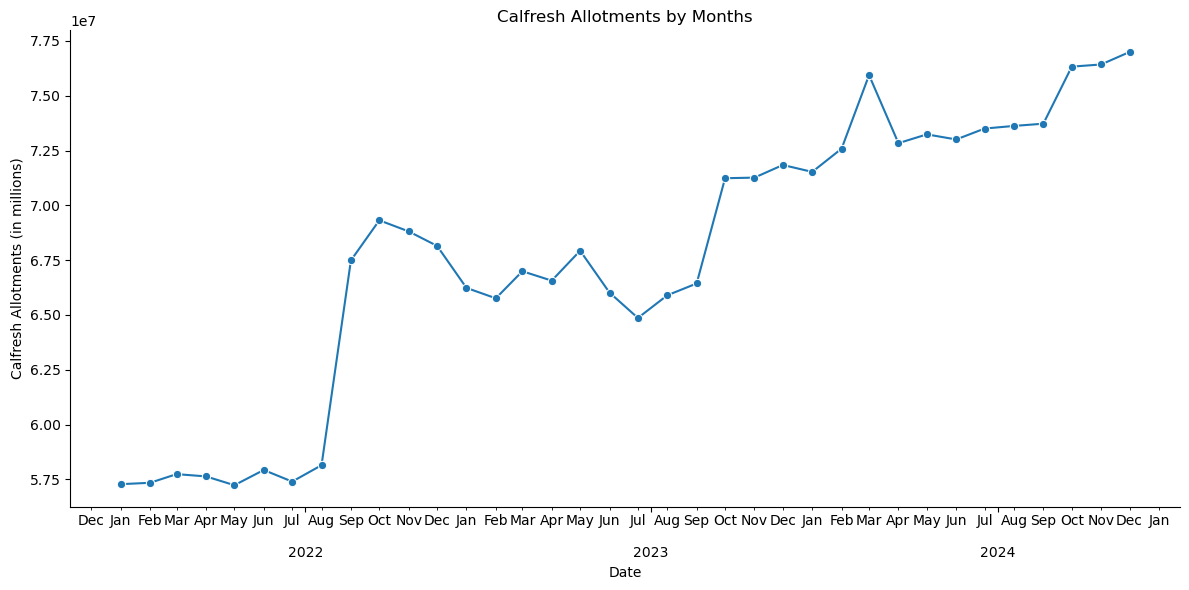

In [30]:
# Credit to Amy for code block

# Creating a line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Date', y='CountyTotal', data= totals22_24, marker='o')
ax.set_title('Calfresh Allotments by Months')
ax.set_xlabel('Date')
ax.set_ylabel('Calfresh Allotments (in millions)')

# Uncomment line below for y-axis in millions
#ax.ticklabel_format(style='plain', axis='y')  

# Setting respective years on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', pad=25) # space between years and months

# Setting respective months on x-axis
ax.xaxis.set_minor_locator(mdates.MonthLocator())  
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) 


sns.despine() 
plt.tight_layout()

When observing the plotted data there is a steady upward trend from 2022 to 2024. However, there are sudden spikes and drops, such as in September 2022, that reflect approved emergency allotments for that month. Despite these sudden spikes the data looks relatively stable.

Observed CalFresh Emergency Allotment Months:

* Food Benefits Available for People Impacted by **Late January 2024 Storms**: "On March 1, 2024, the United States Department of Agriculture approved California’s request for Disaster CalFresh food benefits to enhance recovery efforts in San Diego County. The program is known nationally as the Disaster Supplemental Nutrition Assistance Program, or D-SNAP."<a name="cite_ref-8"></a>[<sup>8</sup>](#cite_note-8)

* **COVID-19 CalFresh emergency allotment for August, 2022**: "California has been approved to issue an emergency allotment of CalFresh for August, 2022.  All households will receive at least the maximum CalFresh allotment. The emergency allotment will be issued on September 4, 2022 for CalSAWS counties and September 10, 2022 for CalWIN counties. Additional allotments were approved in September and issued October 16th, 2022." <a name="cite_ref-9"></a>[<sup>9</sup>](#cite_note-9)

Termination of Covid-19 Emergency Allotments:

* **Covid-19 Emergency Allotments ended in February 2023**, with the last amounts being  issued in March 2023. April will be the first month benefit holders will see a decrease in the amount of CalFresh benefits.

---
## 3.3 Predictive Modeling

We begin by generating a predictive models to examine the relationship between total CalFresh allotments and a specific month in the year. 

The first approach we take is a multiple linear regression to understand whether the observed drops and spikes in the data have an impact on model performance. 

The formula that takes the form of the following:

$${CountyTotal} = \beta_0+ \beta_1*{Month}+ \beta_2*{Year}+\epsilon$$

In [31]:
# Using multiple linear regression model to estimate CalFresh dollars issued (CountyTotal) dependent on the month and year.
model = smf.ols(data=totals22_24, formula="CountyTotal ~ month + year").fit()

# Summary table of our model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CountyTotal   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.29
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           2.62e-14
Time:                        15:43:51   Log-Likelihood:                -580.51
No. Observations:                  36   AIC:                             1167.
Df Residuals:                      33   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.303e+10   1.05e+09    -12.393      0.000   -1.52e+10   -1.09e+10
month       6.899e+05   1.23e+05      5.614      0.000     4.4e+05     9.4e+05
year         6.47e+06    5.2e+05     12.453      0.000    5.41e+06    7.53e+06
==============================================================================
Omnibus:                        1.438   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.301
Skew:                           0.437   Prob(JB):                        0.522
Kurtosis:                       2.679   Cond. No.                     5.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When looking at model performance the model is statistically significant, with an adjusted R-squared of 0.84. Additionally, both month and year have a small p-value which confirms that we do see a gradual incresse in CalFresh allotments over time. However, we take into account the Durbin-Watson statistic, at 0.668, which suggests that the model is overlooking the spikes/drops in the data leading to autocorrelation. This leads us to incorporate dummy variables to account for these fluctuations.


In [32]:
# Looking at model parameters
model.params

Intercept   -1.302563e+10
month        6.898861e+05
year         6.469991e+06
dtype: float64

The model predicts the following:

* For every month, CalFresh allotments go up by $689,900.
  
* For every year, CalFresh allotments go up by $6.47 million.

---
### Creating Dummy Variables for Emergency Allotments and end of Covid Emergency Allotments

We set `emergency_allotments` to 0 for the portion of the data that does not have an approval to issue an emergency allotment, we set `emergency_allotments` to 1 for the presence of an approval for an emergency allotment.

We set `covid_end` to 0 for the portion of the data that was not in the time period of the end of federal pandemic aid programs, we set `covid_end` to 1 for months that saw a decrease in CalFresh allotments from the end of federal pandemic aid programs.

In [33]:
# creating the index for months that had an approval for an emergency allotment
emergency_allotments = ['2022-09-01', '2024-03-01']

# turning into a datetime column
emergency_allotments = pd.to_datetime(emergency_allotments)

# setting the index
totals22_24['emergency_allotments'] = totals22_24['Date'].isin(emergency_allotments).astype(int)


# creating the index for months that had COVID emergency allotments end
covid_end = ['2023-04-01']

# turning into a datetime column
covid_end = pd.to_datetime(covid_end)

# setting the index
totals22_24['covid_end'] = totals22_24['Date'].isin(covid_end).astype(int)

---
### Predictive Modeling with Dummy Variables

Now, we generate a multiple linear regression model that accounts for the spikes and drops in the data set. We include the new dummy variables, `emergency_allotments` and `covid_end`, to expand the model.

The formula now takes the form of the following:

$${CountyTotal} = \beta_0+ \beta_1*{Month}+ \beta_2*{Year}+ \beta_3*{EmergencyAllotments}+ \beta_4*{CovidEnd}+\epsilon$$

In [34]:
model_2 = smf.ols(data=totals22_24, formula="CountyTotal ~ month + year + emergency_allotments + covid_end ").fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CountyTotal   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     56.51
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           8.44e-14
Time:                        15:43:51   Log-Likelihood:                -576.55
No. Observations:                  36   AIC:                             1163.
Df Residuals:                      31   BIC:                             1171.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.303e+10   9.71e+08    -13.408      0.000    -1.5e+10    -1.1e+10
month                 7.065e+05   1.15e+05      6.169      0.000    4.73e+05     9.4e+05
year                   6.47e+06    4.8e+05     13.473      0.000    5.49e+06    7.45e+06
emergency_allotments  4.711e+06   1.71e+06      2.748      0.010    1.21e+06    8.21e+06
covid_end             9.748e+05   2.41e+06      0.405      0.688   -3.93e+06    5.88e+06
==============================================================================
Omnibus:                        2.729   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.717
Skew:                           0.511   Prob(JB):                        0.424
Kurtosis:                       3.317   Cond. No.                     5.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The expanded model shows an overall improved performance compared to the first model, with an adjusted R-squared of 0.864. What stands out in the results is the significance of the dummy variables, `emergency_allotments` and `covid_end`. `emergency_allotments` is statistically significant at p = 0.01, `covid_end` however is not statistically significant sitting at p = 0.688. This suggests that the drop in the data set is not large enough to be considered an outlier.

Despite the improvement in the model, we still see the Durbin-Watson score at 0.615, suggesting that the model continues to have a postive autocorrelation. This result overall leads us to come to the conclusion that the model may do best in predicting long term growth but not capture these small spikes and drops present. 

In [35]:
model_2.params

Intercept              -1.302603e+10
month                   7.065487e+05
year                    6.469991e+06
emergency_allotments    4.711305e+06
covid_end               9.747782e+05
dtype: float64

Looking at `emergency _allotments`, the model has predicted an increase in allotments of ~ $4.71m

---
### Plotting Predicted v. Actual CalFresh Allotments

The line plot depicts monthly predicted CalFresh allotments from the multiple linear regression with dummy variables v. the actual CalFresh allotments starting from 2022 to 2024. The x-axis represents time while the y-axis represents the total *$* amount alloted in millions.

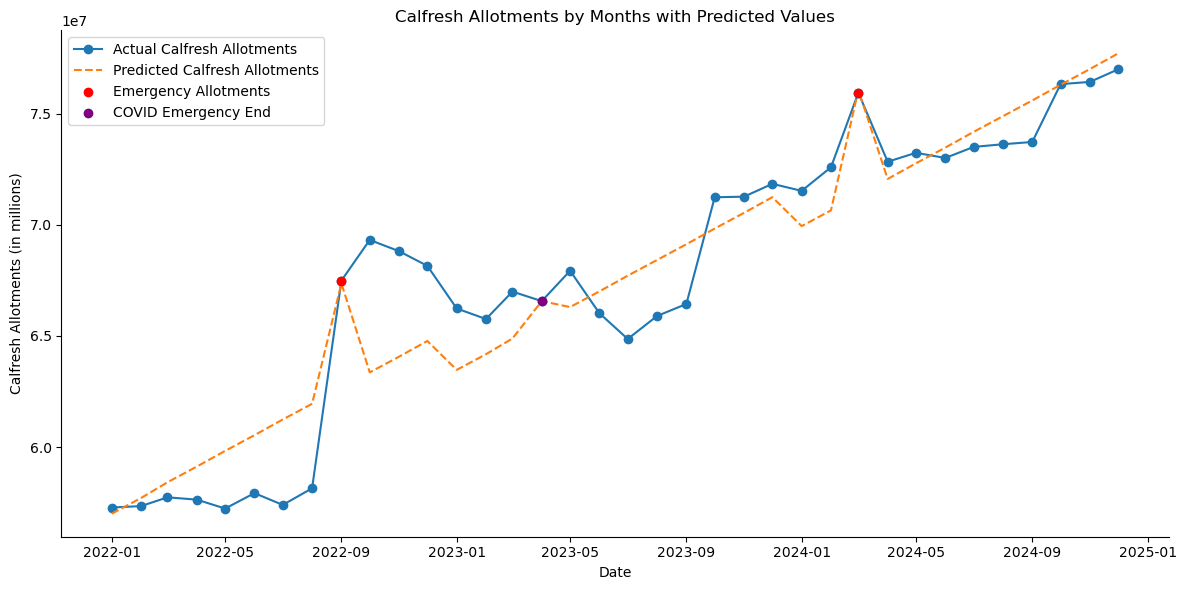

In [36]:
# fitted dependent variable (predictions)
totals22_24_copy = totals22_24.copy()
totals22_24_copy['yhat'] = model_2.fittedvalues

# Creating a line plot
plt.figure(figsize=(12, 6))

plt.plot(totals22_24_copy['Date'],totals22_24_copy['CountyTotal'],label ="Actual Calfresh Allotments", marker='o')
plt.plot(totals22_24_copy['Date'],totals22_24_copy['yhat'],label="Predicted Calfresh Allotments",linestyle='--')

# higlighting dummy months: emergency allotments
emergency_only = totals22_24_copy[totals22_24_copy['emergency_allotments'] == 1]

plt.scatter(emergency_only['Date'], emergency_only['CountyTotal'],
            color='red', label='Emergency Allotments', zorder=3)

# higlighting dummy months: end of covid-19 emergency allotments
covid_only = totals22_24_copy[totals22_24_copy['covid_end'] == 1]

plt.scatter(covid_only['Date'], covid_only['CountyTotal'],
            color='purple', label='COVID Emergency End', zorder=3)


plt.title('Calfresh Allotments by Months with Predicted Values')
plt.xlabel('Date')
plt.ylabel('Calfresh Allotments (in millions)')
legend=plt.legend()

sns.despine() 
plt.tight_layout()

When observing the plotted predicted values the model does well in capturing the upward trend, and the spikes from the months with emergency allotments. However, it does not capture the small flucations across the months which reflects on the capacity of a multiple linear regression model.

---
## 3.4 Multiple Linear Regression Model Predictions

Below we proceeded with using the model to predict the *$* issued in CalFresh benefits for each month, starting with the first quarter of 2025, assuming no emergency allotments or drops in benefits.

In [37]:
# create new DataFrame with the first quarter of 2025 (Jan - Mar)
df_new = pd.DataFrame({'month': [1,2,3], 
                       'year': [2025, 2025, 2025],
                      'emergency_allotments': [0, 0, 0],#assuming no emergency allotments
                       'covid_end': [0, 0, 0]#assuming no drops in benefits
                      })

print(df_new)

   month  year  emergency_allotments  covid_end
0      1  2025                     0          0
1      2  2025                     0          0
2      3  2025                     0          0


In [38]:
# predict scores for the next 3 months (Jan-Mar 2025)
model_2.predict(df_new)

0    7.641025e+07
1    7.711680e+07
2    7.782335e+07
dtype: float64

The model predicts monthly increases of around $700k per month, which is consistent with the results of the regression above. 

* January 2025 = $76,410,250
  
* February 2025 = $77,116,800
  
* March 2025  = $77,823,350

---

# 4. Predicting Total School Meals

In this next section, we explore options to predict total school meals provided. As previous notes, SDHC currently operates on a 4 month time lag to provide insight on the meal gap - school meal data contributes greatly to this delay. Thus, we aim to build the foundations for an accurate model to predict school meal data on a monthly basis to allow SDHC to work and report on a smaller time lag.

## 4.1 Data Cleaning/Wrangling

Currently, the data available to us includes school meal data from July 2021 - March 2022, spread across three different dataframes (`CACFP_2122`, `SFSP_21`, and `SNP_2122`) and school meal data from January 2021 - June 2021, April 2022 - September 2024 (`school_meal_incomplete`). Prior to any modeling exploration, we must clean all our datasets and merge them together.

In [39]:
# Additional Imports 
# uncomment below and run if installation is needed (Juypter Notebook)
# !pip install pandas scikit-learn statsmodels numpy matplotlib seaborn scipy piecewise-regression pwlf

from sklearn import linear_model

import matplotlib.ticker as ticker

from scipy.fft import dct, idct
import piecewise_regression
import pwlf
from scipy.optimize import minimize

In [40]:
# load in datasets, provided by California Department of Education, Nutrition Services Division

# CACFP (July 2021 to March 2022) - Retrieved on June 15, 2022 
CACFP_2122 = pd.read_csv('data/school_meals/CACFP_July21March22.csv')

# SFSP July to August 2021 (no Sept 2021 to Mar 2022 data) - Retrieved on June 15, 2022 
SFSP_21 = pd.read_csv('data/school_meals/SFSP_JulyAug_2021.csv')

# SNP (July 2021 to March 2022) - Retrieved on June 15, 2022 
SNP_2122 = pd.read_csv('data/school_meals/SNP_July21March22.csv')

# SDHC School Meal Data 
school_meal_incomplete = pd.read_csv('data/school_meals/school_meals_incomplete.csv')

---
### Wrangling CACFP_2122 Data

In [41]:
# only saving relevant columns 
CACFP_2122 = CACFP_2122[['FnsReportDate','MealTypeCode','DaysServedQty',' SumOfMlsServedTotal ']]

# Clean out whitespace in column names and lowercase 
CACFP_2122.rename(columns={c: c.strip().lower() for c in CACFP_2122.columns.tolist()}, inplace=True)

# Change sumofmlsservedtotal from object to int
CACFP_2122['sumofmlsservedtotal'] = (CACFP_2122['sumofmlsservedtotal']
    .astype(str)           # Convert to string
    .str.replace(',', '')  # Remove commas
    .str.strip()           # Remove any surrounding whitespace
    .astype(int)           # Convert to integer
)

In [42]:
# checking unique mealtypecodes 
cacp_mealtypes = CACFP_2122['mealtypecode'].unique()

# removing rows with snacks
CACFP_2122 = CACFP_2122[~CACFP_2122['mealtypecode'].str.contains('SNACK')]

# grouping by fnsreportdate to get the full sum of mlsservedtotal
CACFP_2122 = CACFP_2122.groupby(['fnsreportdate']).sum()[['sumofmlsservedtotal']].reset_index()

In [43]:
# adding in a month and year column using fnsreportdate information

# Applying both functions and creating new columns 
CACFP_2122['month'] = CACFP_2122['fnsreportdate'].apply(get_month_MY)
CACFP_2122['year'] = CACFP_2122['fnsreportdate'].apply(get_year_MY)

# Dropping fnsreportdate column
CACFP_2122 = CACFP_2122[['month', 'year', 'sumofmlsservedtotal']]

# Renaming sumofmlsservedtotal for merging later
CACFP_2122 = CACFP_2122.rename(columns= {'sumofmlsservedtotal': 'cacptotal'})


In [44]:
CACFP_2122.head()

,month,year,cacptotal
0,8,2021,812057
1,12,2021,1371966
2,2,2022,1621623
3,1,2022,1498780
4,7,2021,475147


---
### Wrangling SFSP_21 Data

In [45]:
# only saving relevant columns 
SFSP_21 = SFSP_21[['ClaimDate','MealTypeCode','DaysServedQty','MlsServedFree']]

# Clean out whitespace in column names and lowercase 
SFSP_21.rename(columns={c: c.strip().lower() for c in SFSP_21.columns.tolist()}, inplace=True)

# Change sumofmlsservedtotal from object to int
SFSP_21['mlsservedfree'] = (SFSP_21['mlsservedfree']
    .astype(str)           # Convert to string
    .str.replace(',', '')  # Remove commas
    .str.strip()           # Remove any surrounding whitespace
    .astype(int)           # Convert to integer
)

In [46]:
SFSP_21.head()

,claimdate,mealtypecode,daysservedqty,mlsservedfree
0,7/1/2021,SFSP_LUNCH_VENDED,5,481
1,7/1/2021,SFSP_SNACK_PM_VENDED,5,480
2,8/1/2021,SFSP_LUNCH_VENDED,5,495
3,8/1/2021,SFSP_SNACK_PM_VENDED,5,497
4,7/1/2021,SFSP_LUNCH_VENDED,21,1353


In [47]:
# checking unique mealtypecodes 
sfsp_mealtypes = SFSP_21['mealtypecode'].unique()

# removing rows with snacks
SFSP_21 = SFSP_21[~SFSP_21['mealtypecode'].str.contains('SNACK')]

# grouping by claimdate to get the full sum of mlsservedfree
SFSP_21 = SFSP_21.groupby(['claimdate']).sum()[['mlsservedfree']].reset_index()

In [48]:
# Adding in a month and year column using claimdate information

# applying functions to claimdate column
SFSP_21['month'] = SFSP_21['claimdate'].apply(get_month_MDY)
SFSP_21['year'] = SFSP_21['claimdate'].apply(get_year_MDY)

# Dropping fnsreportdate column
SFSP_21 = SFSP_21[['month', 'year', 'mlsservedfree']]

# Renaming sumofmlsservedtotal for merging later
SFSP_21 = SFSP_21.rename(columns= {'mlsservedfree': 'sfsptotal'})

In [49]:
SFSP_21

,month,year,sfsptotal
0,7,2021,81166
1,8,2021,33808


---

### Wrangling SNP_2122 Data

In [50]:
# only saving relevant columns 
SNP_2122 = SNP_2122[['ClaimDate','MealTypeCode','DaysServedQty',' MlsServedTotal ']]

# Clean out whitespace in column names and lowercase 
SNP_2122.rename(columns={c: c.strip().lower() for c in SNP_2122.columns.tolist()}, inplace=True)

# Change mlsservedtotal from object to int
SNP_2122['mlsservedtotal'] = (SNP_2122['mlsservedtotal']
    .astype(str)           # Convert to string
    .str.replace(',', '')  # Remove commas
    .str.strip()           # Remove any surrounding whitespace
    .astype(int)           # Convert to integer
)

In [51]:
SNP_2122.head()

,claimdate,mealtypecode,daysservedqty,mlsservedtotal
0,8/1/2021,SSFO_BREAKFAST_SEVERENEED,7,75
1,8/1/2021,SSFO_LUNCH,7,798
2,7/1/2021,SSFO_BREAKFAST_SEVERENEED,21,2466
3,7/1/2021,SSFO_LUNCH,21,2674
4,9/1/2021,SSFO_BREAKFAST_SEVERENEED,21,412


In [52]:
# checking unique mealtypecodes 
snp_mealtypes = SNP_2122['mealtypecode'].unique()

# removing rows with snacks
SNP_2122 = SNP_2122[~SNP_2122['mealtypecode'].str.contains('SNACK')]

# grouping by claimdate to get the full sum of mlsservedfree
SNP_2122 = SNP_2122.groupby(['claimdate']).sum()[['mlsservedtotal']].reset_index()

In [53]:
# Adding in a month and year column using claimdate information

# applying functions to claimdate column
SNP_2122['month'] = SNP_2122['claimdate'].apply(get_month_MDY)
SNP_2122['year'] = SNP_2122['claimdate'].apply(get_year_MDY)

# Dropping fnsreportdate column
SNP_2122 = SNP_2122[['month', 'year', 'mlsservedtotal']]

# Renaming sumofmlsservedtotal for merging later
SNP_2122 = SNP_2122.rename(columns= {'mlsservedtotal': 'snptotal'})

In [54]:
SNP_2122.head()

,month,year,snptotal
0,1,2022,5275447
1,10,2021,6869830
2,11,2021,5372742
3,12,2021,4473680
4,2,2022,5887190


---
### Wrangling SDHC School Meal Data

In [55]:
# Clean out whitespace in column names and lowercase 
school_meal_incomplete.rename(columns={c: c.strip().lower().replace(" ", "") for c in school_meal_incomplete.columns.tolist()}, inplace=True)

# Change sumofmlsservedtotal from object to int
school_meal_incomplete['totalschoolmeals'] = (school_meal_incomplete['totalschoolmeals']
    .astype(str)           # Convert to string
    .str.replace(',', '')  # Remove commas
    .str.strip()           # Remove any surrounding whitespace
    .astype(int)           # Convert to integer
)
# Replace '-' with ' ' in month column so get_month_MY and get_year_MYcan be applied
school_meal_incomplete['date'] = school_meal_incomplete['month'].str.replace('-', ' ')
school_meal_incomplete['month'] = school_meal_incomplete['date'].apply(get_month_MY)
school_meal_incomplete['year'] = school_meal_incomplete['date'].apply(get_year_MY) + 2000

school_meal_incomplete = school_meal_incomplete[['month', 'year', 'totalschoolmeals']]

In [56]:
school_meal_incomplete.head()

,month,year,totalschoolmeals
0,1,2020,5876199
1,11,2020,5537044
2,1,2021,5356374
3,2,2021,6738688
4,3,2021,7337860


---

### Merging and Concatentating Datasets Together

With all datasets cleaned, we can merge together then CACFP_2122, SFSP_21, and SNP_2122 data and sum each of their respective totals to get all the school meals provided in a given month. The resulting dataset is stored in `jul21_mar22`.

In [57]:
# merging CACFP_2122 and SNP_2122 df together
CACFP_2122_SNP_2122 = pd.merge(CACFP_2122, SNP_2122, left_on=['month', 'year'], right_on=['month', 'year'], how='inner')

# merging SFSP_21 data with CACFP_2122_SNP_2122
jul21_mar22 = pd.merge(CACFP_2122_SNP_2122, SFSP_21, left_on=['month', 'year'], right_on=['month', 'year'], how='left')

# replacing NaN values in sfsptotal column with 0
jul21_mar22['sfsptotal'] = jul21_mar22['sfsptotal'].fillna(0)

# creating a new column 'totalschoolmeals' by summing cacptoal, snptotal, and sfsptotal
jul21_mar22['totalschoolmeals'] = jul21_mar22['cacptotal'] + jul21_mar22['snptotal'] + jul21_mar22['sfsptotal']

# subsetting month, year, and totalschoolmeals
jul21_mar22 = jul21_mar22[['month', 'year', 'totalschoolmeals']]

# dropping repeats for concatentation
jul21_mar22 = jul21_mar22[jul21_mar22['month'] > 3]

The data can now be combined with the rest of SDHC's data on school meals. The resulting dataframe is stored in `school_meals`.

In [58]:
# Combine July 2021 - March 2022 data with the rest of SDHC's school meal data
school_meals = pd.concat([jul21_mar22, school_meal_incomplete], axis=0, ignore_index=True)

# Adding remaining 2024 data (received 4/10/25)
new_rows = pd.DataFrame({
    "month": [10, 11, 12],
    "year": [2024, 2024, 2024],
    'totalschoolmeals': [8900526, 6354103, 6123894]
    })

school_meals = pd.concat([school_meals, new_rows], ignore_index=True)

# Sort by date in ascending order
school_meals.sort_values(by=['year', 'month'], ascending=[True, True], inplace=True)
school_meals.head()

,month,year,totalschoolmeals
6,1,2020,5876199.0
7,11,2020,5537044.0
8,1,2021,5356374.0
9,2,2021,6738688.0
10,3,2021,7337860.0


We also initiate a check for any duplicate values for a given month. If there are no duplicates, the cell below should output `True`. With no duplicates, we export the cleaned dataframe to a .csv file for ease of future use.  

In [59]:
# Double check for duplicates values - if there are no duplicates, cell output should be True (boolean)

# creating a copy of wrangled school_meals dataframe
dup_check = school_meals

# creating a datetime column (these should all be unique values if there are no duplicates in the dataframe)
dup_check['date'] = pd.to_datetime(dup_check[['year', 'month']].assign(day=1))

# getting number of unique rows (dates)
num_unique = len(dup_check['date'].unique())

# comparing number of unique rows to total number of rows (True = no duplicates; False = duplicates)
num_unique == len(dup_check['date'])

True

In [60]:
# # Leave commented, exporting cleaned dataframe to .csv file
# school_meals.to_csv('school_meals_2021_2024.csv', index=False, sep=',', na_rep='', encoding='utf-8')

----

## 4.2 Visualizing Total School Meals 

With the cleaned dataframe, we contruct a line plot of school meals over time to visualize the data we have. To do this, we first filter out the two 2020 data points since we don't have the remaining 2020 data, plotting from 2021-2024. The x-axis represents time while the y-axis represents total school meals in millions. The vertical lines on the plot separate and designate each year.

In [61]:
# filtering out 2020 data (non-continuous)
no_2020 = school_meals[school_meals['year']!= 2020]

# Creating a datetime column to plot easier
no_2020 = no_2020.copy()
no_2020['date'] = pd.to_datetime(no_2020[['year', 'month']].assign(day=1))
no_2020 = no_2020.sort_values(by='date')

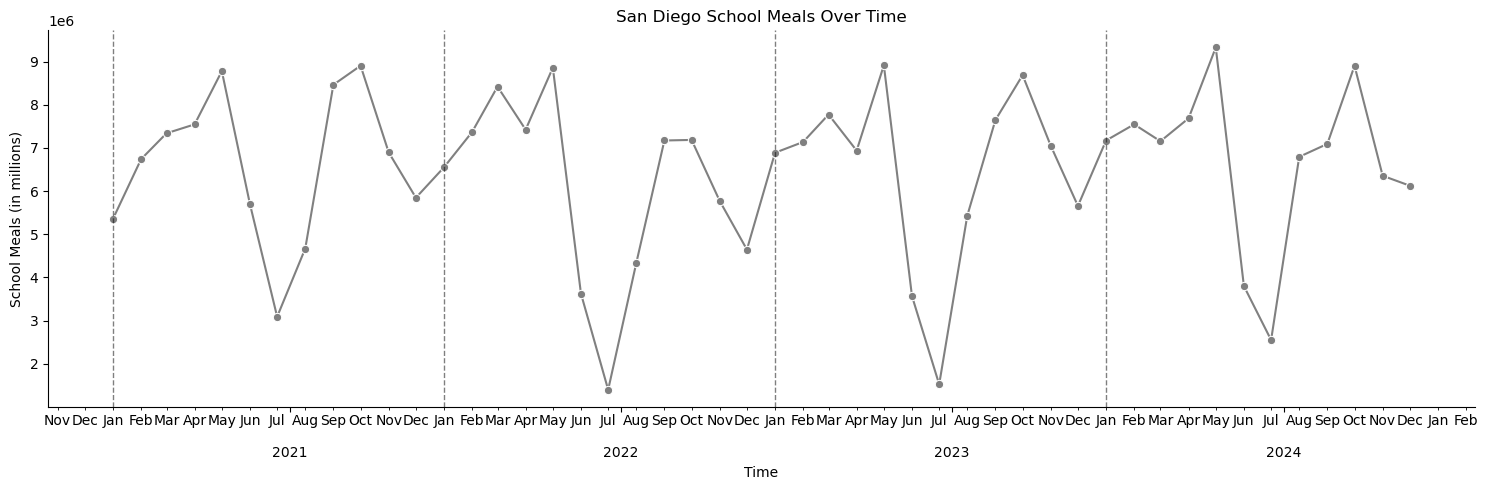

In [62]:
# Creating a line plot
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='date', 
                  y='totalschoolmeals', 
                  data=no_2020, 
                  marker='o', 
                  color = 'gray')
ax.set_title('San Diego School Meals Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('School Meals (in millions)')

# Uncomment line below for y-axis in millions
#ax.ticklabel_format(style='plain', axis='y')  

years = [2021, 2022, 2023, 2024]
for y in years:
    ax.axvline(pd.Timestamp(f'{y}-01-01'),
               color='black',
               linestyle='--',
               linewidth=1,
               alpha=0.5)

# Setting respective years on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', pad=25) # space between years and months

# Setting respective months on x-axis
ax.xaxis.set_minor_locator(mdates.MonthLocator())  
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) 

sns.despine() 
plt.tight_layout()
plt.show()

From the plotted data, it becomes evident that there is a periodic pattern of total school meals in a year. Meals increase starting January, ending in May; from there, they decrease until July and rise until October. Meals decrease from then to the end of the year. While there is variability across each year, this general pattern holds. Keeping the periodicity of the data in mind, we can leverage this to build predictive models.

## 4.3 Ordinal Piecewise Regression
Ordinal piecewise regression allows us to quantify a relationship where the independent variable is ordinal, and there may be multiple relationships to examine in our data. The independent variable is segmented by points, and a separate regression line is fit to each interval. This helps us compare, for example, how a variable changes from Fall to Winter, versus how the same variable changes from Spring to Summer.

Being able to quantify how the number of total school meals can change across the year, as well as what patterns certain months are characterized by, can inform better predictions. Here, we plot an ordinal piecewise regression line for each year separately, then on top of one another to better display how the relationships differ.

In [63]:
# Separate data by years: 2022, 2023, 2024 (these are the only years where we have data for all 12 months)

# 2021 School meals data
school_meals_2021 = school_meals[school_meals['year'] == 2021]

# 2022 School meals data
school_meals_2022 = school_meals[school_meals['year'] == 2022]

# 2023 School meals data
school_meals_2023 = school_meals[school_meals['year'] == 2023]

# 2024 School meals data
school_meals_2024 = school_meals[school_meals['year'] == 2024]

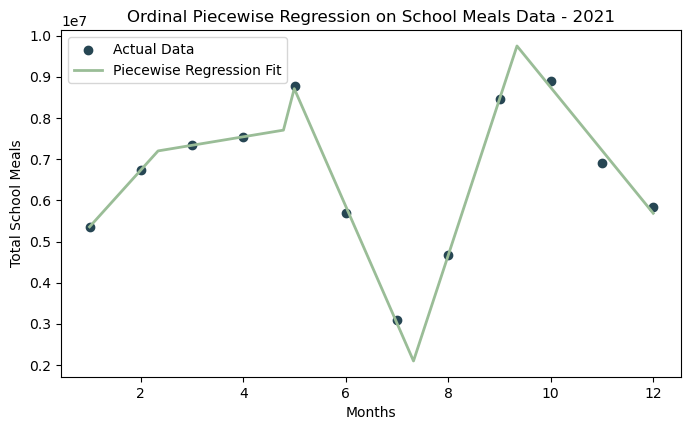

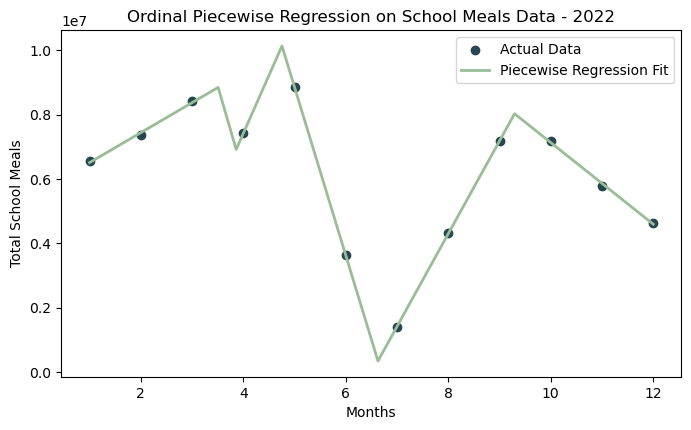

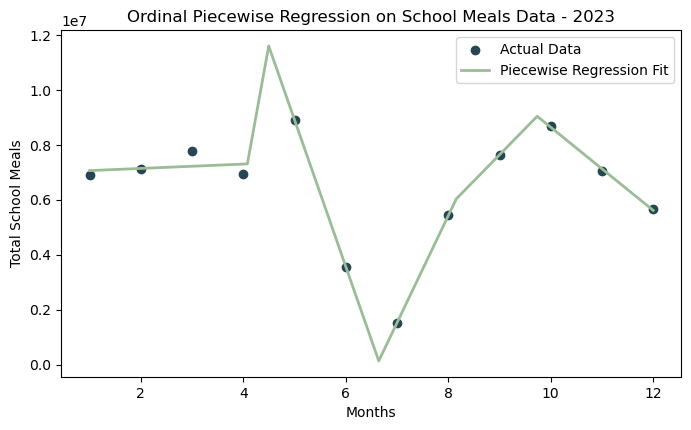

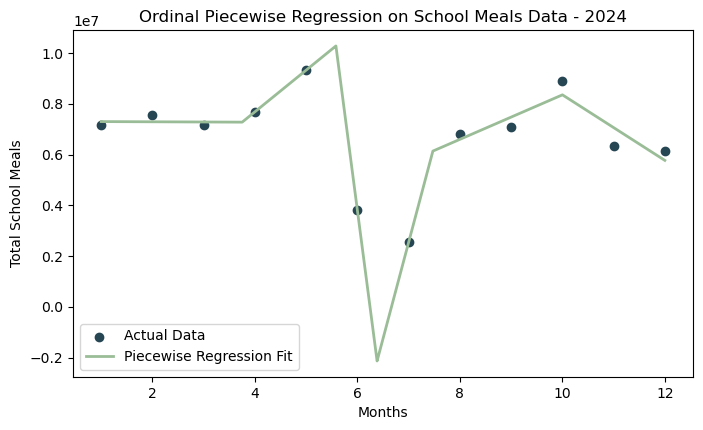

In [78]:
dfs = [school_meals_2021, school_meals_2022, school_meals_2023,school_meals_2024]
years = ['2021','2022','2023', '2024']

def pw_model_individual(dfs, years):
        
    for df, year in zip(dfs, years):
        # Fit piecewise model to data
        pw_model = pwlf.PiecewiseLinFit(df['month'], df['totalschoolmeals'])

        # Fit the data for 6 line segments 
        res = pw_model.fit(6)

        # Predict for the determined points
        xHat = np.linspace(min(df['month']), max(df['month']), num=10000)
        yHat = pw_model.predict(xHat)

        # Plot the results
        plt.figure(figsize=(8, 4.5))
        plt.scatter(df['month'], df['totalschoolmeals'], label="Actual Data", color='#264653')
        plt.plot(xHat, yHat, label="Piecewise Regression Fit", color='#9ABD97', linewidth=2)
        plt.xlabel("Months")
        plt.ylabel("Total School Meals")
        plt.title("Ordinal Piecewise Regression on School Meals Data - " + year)
        plt.legend()
        plt.show()
                
pw_model_individual(dfs, years)

In [76]:
# Function to produce only the beta values
def pw_model_betas(dfs, years):
    
    betas = []
    
    for df, year in zip(dfs, years):
        # Fit piecewise model to data
        pw_model = pwlf.PiecewiseLinFit(df['month'], df['totalschoolmeals'])
        
        # Fit the data for 6 line segments 
        res = pw_model.fit(6)        

        # Generate parameter values, and store in list betas
        betas.append(pw_model.beta)
        
    return betas
                
pw_model_betas(dfs, years)


[array([ 5356374.02200929,  1382313.89010049, -1176024.04372467,
         1194226.70299584, -4244409.03816922,  6635282.522234  ,
        -5319933.03665721]),
 array([ 6512065.33333333,   933863.99999999, -3049370.39788867,
         5889540.01326209, -9005853.63966305,  8117842.01960661,
        -4155773.49174731]),
 array([  7065669.69999997,     78272.70000001,  14337013.51953269,
        -19759841.02465183,   9251775.07392641,  -1717695.19922194,
         -3703638.68425997]),
 array([ 7.29895342e+06, -9.83141802e+03,  1.64892813e+06, -1.42764544e+07,
         1.77668854e+07, -4.25246701e+06, -2.16913343e+06])]

We specified 6 line segments. Therefore, we should be expecting 7 betas, which are the values corresponding to each breakpoint in between the lines. The average value for each breakpoint across the years is displayed here.

In [77]:
# Compute the average of corresponding elements across years
averaged_betas = np.mean(pw_model_betas(dfs, years), axis=0).tolist()
averaged_betas

# Create table of average breakpoints
data_avgbp = {'Breakpoints': [1,2,3,4,5,6,7], 'Values': averaged_betas}
df_avgbp = pd.DataFrame(data = data_avgbp)

df_avgbp

,Breakpoints,Values
0,1,6.558056e+06
1,2,5.964932e+05
2,3,-4.616125e+06
3,4,2.349910e+06
4,5,1.951038e+06
5,6,2.160552e+06
6,7,-3.842979e+06


However, in averaging the breakpoint values, we lose valuable information about how months can vary year to year. This means we lose the level of granularity in our model that allows us to gain insight into how total school meals differ across time. Here, we plotted the regression lines on top of each other to highlight the different trends from year to year.

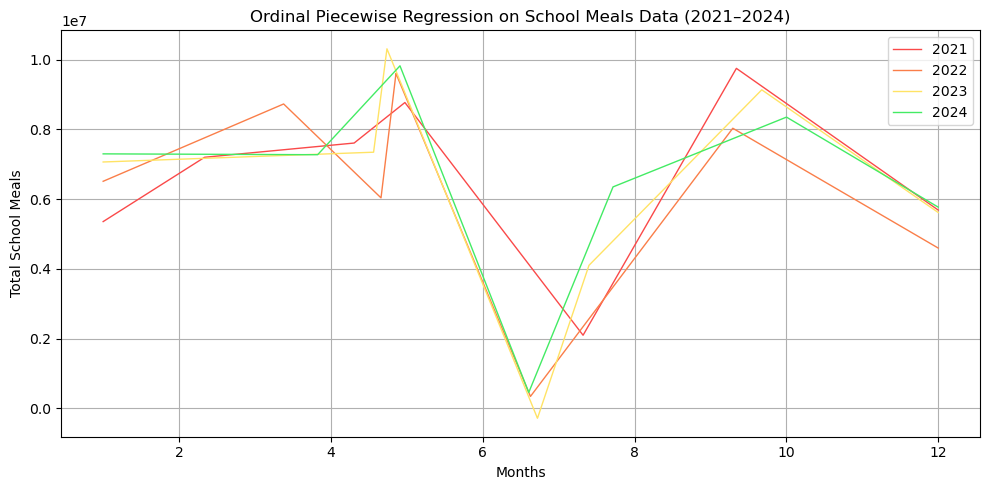

In [80]:
dfs = [school_meals_2021, school_meals_2022, school_meals_2023, school_meals_2024]
years = ['2021', '2022', '2023', '2024']
colors = ['#FA4949', '#FA7E49', '#FFE365', '#43EB64']  # assign different colors for each year


def pw_model_stacked(dfs, years,colors):
    
    plt.figure(figsize=(10, 5))     
    
    for df, year, color in zip(dfs, years, colors):
        # Fit piecewise model to data
        pw_model = pwlf.PiecewiseLinFit(df['month'], df['totalschoolmeals'])

        # Fit the data for X line segments
        res = pw_model.fit(6)

        # Predict for smooth line
        xHat = np.linspace(min(df['month']), max(df['month']), num=10000)
        yHat = pw_model.predict(xHat)

        # Plot on the same figure
        plt.plot(xHat, yHat, label=f"{year}", color=color, linewidth=1)


    # Add labels, title, and legend
    plt.xlabel("Months")
    plt.ylabel("Total School Meals")
    plt.title("Ordinal Piecewise Regression on School Meals Data (2021–2024)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
pw_model_stacked(dfs, years,colors)

We can also populate a table with the specific values to display how trends in total school meals have differed across years.

In [81]:
# Define breakpoint numbers
breakpoints = ['Breakpoint 1', 'Breakpoint 2', 'Breakpoint 3', 'Breakpoint 4','Breakpoint 5','Breakpoint 6','Breakpoint 7']

# Create dataframe
df_allbps = pd.DataFrame(pw_model_betas(dfs, years),index = years, columns = breakpoints)

df_allbps


,Breakpoint 1,Breakpoint 2,Breakpoint 3,Breakpoint 4,Breakpoint 5,Breakpoint 6,Breakpoint 7
2021,5.356374e+06,1.382314e+06,-1.176024e+06,1.918045e+07,-2.223063e+07,6.635282e+06,-5.319933e+06
2022,6.512065e+06,9.338640e+05,-1.643019e+07,2.608026e+07,-1.581575e+07,8.117842e+06,-4.155773e+06
2023,7.065670e+06,7.827270e+04,2.783304e+07,-3.325586e+07,9.808007e+06,-2.250414e+06,-3.727150e+06
2024,7.298139e+06,-8.513738e+03,1.649012e+06,-8.066559e+06,5.461682e+07,-4.731449e+07,-2.168039e+06


In our plots, the overall trend of the line looks relatively similar from year to year. For example, the first few months are usually characterized with a slow growth, then we see a sharp drop in June and July. However, when we take a look at the breakpoints, it's clear to see that there are significant differences at certain breakpoints across years. In 2021, 2023, and 2024, the number of total school meals increases gradually from January to April. However, in 2022, we see drop in school meals around March, and a quicker increase through April. 

This highlights how piecewise regression can uncover shifts in trends that aren’t immediately obvious from overall patterns, and allows us to identify year-specific differences - possibly due to external factors like school closures, policy changes, or COVID-related disruptions.

---

## 4.4 DCT (Discrete Cosine Transform) Models

Another approach we can take if the goal is purely prediction, is a discrete cosine transform (DCT). If we treat the school meal data over a given year as a one-dimensional periodic function, we can use DCT. A DCT expresses a sequence of data points in terms of a sum of cosine functions at different frequencies.<a name="cite_ref-10"></a>[<sup>10</sup>](#cite_note-10)

$$DCT = \displaystyle\sum A * cos(fx)$$

Where:
- $A$: amplitude (height) of the cosine wave
- $f$: frequency of the cosine wave 
- $x$: time

This summation of cosine functions serves as a smoothed approximation of the entire original function.

While DCT cannot be used for statistical inference to compare months like the ordinal piecewise, it's a predictive method to find a function to describe the data in general. DCT assumes regularity, so it won't do well to predict sudden changes year to year - it's good for long term sustainability.

We implement the DCT by averaging coefficients across each year, by the month. The coefficients then, and their summation, would represent the average function of `totalschoolmeals` in a year. Doing this, only full years (in this instance 2021-2024) can be used to create the DCT function, but 2025 should be used to test it when it becomes avaliable. The graph below shows the summed DCT, along with all the cosine components that are summed to create it. 

In [82]:
# Reshape data for DCT (years as rows, months as columns)

reshaped_data_dct = school_meals[(school_meals['year'] >= 2021)].pivot_table(
    index='year', 
    columns='month', 
    values='totalschoolmeals')

reshaped_data_dct

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2021,5356374.0,6738688.0,7337860.0,7544150.0,8777334.0,5698603.0,3089549.0,4669381.0,8460771.0,8902732.0,6895755.0,5845646.0
2022,6550820.0,7368420.0,8418548.0,7421060.0,8856994.0,3625174.0,1398812.0,4332730.0,7170856.0,7183981.0,5770928.0,4644478.0
2023,6887293.0,7136595.0,7772040.0,6936387.0,8912131.0,3567576.0,1523908.0,5431128.0,7644164.0,8684231.0,7050235.0,5656004.0
2024,7170501.0,7544873.0,7153536.0,7684255.0,9325539.0,3799399.0,2550307.0,6792540.0,7091909.0,8900526.0,6354103.0,6123894.0


In [83]:
# Apply the DCT along the month axis (axis=1) to examine monthly (seasonal) patterns
dct_by_month = dct(reshaped_data_dct, type=2, axis=1, norm='ortho')

# Average DCT coefficients across months
average_dct = np.mean(dct_by_month, axis = 0)

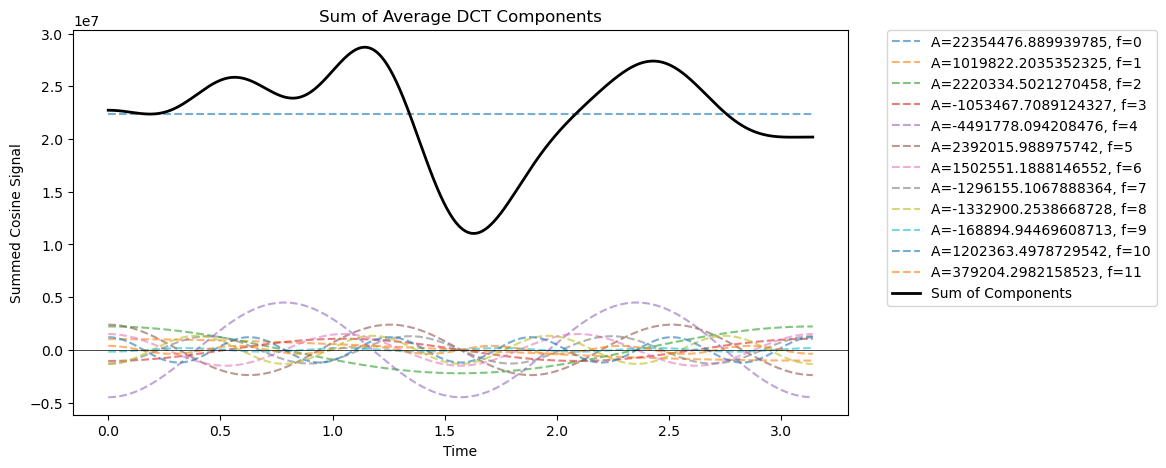

In [84]:
# Plot what the summed DCT equation looks like 

x = np.linspace(0, np.pi, 1000)
y_total = np.zeros_like(x)  # Initialize y_total with zeros
components = []

# Define cosine components: (Amplitude, Frequency, Phase Shift)
for f in range(0, len(average_dct)):
    component = (average_dct[f], f)
    components.append(component)

# Add each cosine component to y_total
for A, f in components:
    y_total += A * np.cos(f * x)

# Plot individual components - lines 16-20 can be commented out if the total sum is the only quantity of interest
plt.figure(figsize=(10, 5))
for A, f in components:
    y = A * np.cos(f * x)
    plt.plot(x, y, linestyle="dashed", alpha=0.6, label=f"A={A}, f={f}")

# Plot the total sum of cosine components
plt.plot(x, y_total, color='black', linewidth=2, label="Sum of Components")

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("Summed Cosine Signal")
plt.title("Sum of Average DCT Components")
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

Thus, our resulting DCT equation is:

$$D = 22354476.89 + 1019822.2 \cos(x) + 2220334.5 \cos(2x) - 1053467.71 \cos(3x) - 4491778.09 \cos(4x) + 2392015.99 \cos(5x) + 1502551.19 \cos(6x) - 1296155.11 \cos(7x) - 1332900.25 \cos(8x) - 168894.94 \cos(9x) + 1202363.5 \cos(10x) + 379204.3 \cos(11x)$$

Where:
- $D$: the raw DCT prediction
- $x$: a given point in time

Since the DCT predictions generated from summing up 12 cosine equations, the resulting raw predictions are too high. To normalize these predictions, we first transform the raw predictions to z-scores. Z-scores are a method of standardizing values using a distribution's mean and standard deviation. Raw scores are transformed into a measure that quantifies how many standard deviations a data point is from the mean:

$$z = \frac{D - M}{s}$$

Where:

 - $z$: z-score
 - $D$: raw DCT prediction
 - $M$: mean of DCT raw predictions
 - $s$: standard deviation of DCT raw predictions

From there, we can can transform the z-scores using a chosen mean and standard deviation to get the predicted total school meals for each month in a year on a more accurate scale. 

$$total school meals = M_{new} + z * s_{new}$$

Where: 
 - $z$: z-score
 - $M_{new}$: chosen mean of total school meals
 - $s_{new}$: chosen standard deviation of total school meals

This allows for greater flexibility in how the DCT can be used. For example, if the ordinal piecewise function above suggests that total school meals across the years have been significantly increasing, one could increase the 2024's mean for 2025's predictions. Additionally, if Q1 predictions are higher than the actual values, the mean and standard deviation for Q2 predictions could consequently be adjusted as needed. 

Using this framework as a basis, we created two, slightly different models that use the same summed cosine equation, but slightly different approaches for the z-scores then obtained. Both model functions created (`school_meal_one_per_month` and `school_meal_average_per_month`) use 2021-2024's mean and standard deviation as default $M_{new}$ and $s_{new}$ parameters, unless otherwise specified.

### Model 1: One Z-score Per Month 

The first model takes one single raw prediction (and z-score) for each given month in a year, for a total of 12 predictions. 

In [85]:
# function to get predictions for a quarter
def school_meal_one_per_month(months, mean = 'total', std_dev = 'total'):
    """
    This function takes a list of months and returns their predicted total school meal amount.
    
    Args: 
        months (list): a list of 3 month's numerical values (can be more or less, but not empty)
        mean (float): optional, default is set to the mean all school meals after 2020
        std_dev (float): optional, default is set to the standard deviation of all school meals after 2020
    
    Returns:
        specific_predictions (dict): a dictionary where keys correspond to months, and values correspond
        to predicted total school meals.
    
    Examples:
    Default - using total mean and total standard deviation:
    >>> school_meal_one_per_month([1, 2, 3])
    
    {1: 6655274, 2: 6684396, 3: 8062922}
    ------
    Choosing a mean and standard deviation (2024):
    >>> twentyfour_school = school_meals[(school_meals['year'] == 2024)]
    >>> twentyfour_mean = twentyfour_school['totalschoolmeals'].mean()
    >>> twentyfour_std = twentyfour_school['totalschoolmeals'].std()
    >>> school_meal_one_per_month([1, 2, 3, 4, 5, 6, 7], twentyfour_mean, twentyfour_std)
    
    {1: 6905219, 2: 6933694, 3: 8281603, 4: 7456397, 5: 9540633, 6: 4570985, 7: 2190879}
    """
    # Mapping months in the year to pi
    dct_month_pi = np.pi / 11
    dct_months = {m: (m - 1) * dct_month_pi for m in range(1, 13)}
        
    temp_school = school_meals[(school_meals['year'] >= 2021)]
    
    # Checking to see a mean/standard deviation were provided in parameters  
    if mean == 'total' and std_dev == 'total':
        # Get mean and sd from all total school meals for standardization
        new_mean = temp_school['totalschoolmeals'].mean()
        new_std = temp_school['totalschoolmeals'].std()
    else:
        new_mean = mean
        new_std = std_dev

    # Reshape data into appropriate format for DCT
    reshaped_data_dct = temp_school.pivot_table(
        index='year',
        columns='month',
        values='totalschoolmeals')
    
    dct_by_month = dct(reshaped_data_dct, type=2, axis=1, norm='ortho')
    average_dct = np.mean(dct_by_month, axis = 0)
    
    # Getting dct predictions 
    yearly_prediction = {}
    for month in dct_months:
        dct_month = dct_months[month]
        predicted_month_total = 0
        for coefficient in range(0, 12):
            predicted_month_total += average_dct[coefficient] * np.cos(coefficient * dct_month)
        yearly_prediction[month] = round(predicted_month_total)
    
    # Compute dct predictions mean and standard deviation
    dct_mean = np.mean(list(yearly_prediction.values()))
    dct_std = np.std(list(yearly_prediction.values()))

    # Standardize for school meals (dct prediction --> z-score --> total school meals)
    standardized_score = {}
    for month in yearly_prediction:
        month_prediction = yearly_prediction[month]
        z_score = (month_prediction - dct_mean)/dct_std
        standardized = new_mean + (z_score * new_std)
        standardized_score[month] = standardized
    
    # Return specific months requested
    specific_predictions = {}
    for month in months:
        specific_predictions[month]= round(standardized_score[month])
 
    return specific_predictions

### Model 2: Averaging Z-scores Per Month 

The second model takes advantage of how the DCT treats the total school meals (Y) as continuous across time (X). Although the true data only has one data point per month in a year, a raw prediction for each day in the year can be taken from the DCT, for a total of 365 predictions. From there, a z-score is calculated for each day; those z-scores are mapped to their respective months, which are then averaged to get an averaged z-score for each month. For example, if one is interested in predicting total school meals for January 2025, the raw predictions from the first 31 days out of 365 are computed, transformed into z-scores, and then averaged to get one single z-score for January.

In [86]:
# function to get predictions for a quarter
def school_meal_average_per_month(months, mean = 'total', std_dev = 'total'):
    """
    This function takes a list of months and returns their predicted total school meal amount.
    
    Args: 
        months (list): a list of 3 month's numerical values (can be more or less, but not empty)
        mean (float): optional, default is set to the mean all school meals after 2020
        std_dev (float): optional, default is set to the standard deviation of all school meals after 2020
    
    Returns:
        specific_predictions (dict): a dictionary where keys correspond to months, and values correspond
        to predicted total school meals.
    
    Examples:
    Default - using total mean and total standard deviation:
    >>> school_meal_average_per_month([1, 2, 3])
    
    {1: 6528038, 2: 7202481, 3: 7717102}
    ------
    Choosing a mean and standard deviation (2024):
    >>> twentyfour_school = school_meals[(school_meals['year'] == 2024)]
    >>> twentyfour_mean = twentyfour_school['totalschoolmeals'].mean()
    >>> twentyfour_std = twentyfour_school['totalschoolmeals'].std()
    >>> school_meal_average_per_month([1, 2, 3, 4, 5, 6, 7], twentyfour_mean, twentyfour_std)
    
    {1: 6780809, 2: 7440273, 3: 7943463, 4: 7777536, 5: 8987135, 6: 4738723, 7: 2419123}
    """
    # Mapping days in the year to pi
    dct_days_pi = np.pi / 364
    dct_days = {m: (m - 1) * dct_days_pi for m in range(1, 366)}
        
    temp_school = school_meals[(school_meals['year'] >= 2021)]
    
    # Checking to see a mean/standard deviation were provided in parameters  
    if mean == 'total' and std_dev == 'total':
        # Get mean and sd from all total school meals for standardization
        new_mean = temp_school['totalschoolmeals'].mean()
        new_std = temp_school['totalschoolmeals'].std()
    else:
        new_mean = mean
        new_std = std_dev

    # Reshape data into appropriate format for DCT
    reshaped_data_dct = temp_school.pivot_table(
        index='year',
        columns='month',
        values='totalschoolmeals')
    
    dct_by_month = dct(reshaped_data_dct, type=2, axis=1, norm='ortho')
    average_dct = np.mean(dct_by_month, axis = 0)
    
    # Getting dct predictions 
    raw_yearly_prediction = []
    for day in dct_days:
        dct_day = dct_days[day]
        predicted_day_total = 0
        for coefficient in range(0, 12):
            predicted_day_total += average_dct[coefficient] * np.cos(coefficient * dct_day)
        raw_yearly_prediction.append(round(predicted_day_total))
    
    # map 365 days to respective months
    days_to_year = {1: 31, 2: 59, 3: 90, 4: 120, 5: 151, 6: 181, 7:212, 8: 243, 9: 273, 10: 304, 11: 334, 12: 365}
    days_to_year_keys = list(days_to_year.keys())
    days_to_year_values = list(days_to_year.values())
    all_months = []
    all_days = []
    for day in range(1, 366):
        if day <= days_to_year_values[0]:
            all_months.append(days_to_year_keys[0])
            all_days.append(day)
        else:
            days_to_year_values = days_to_year_values[1:]
            days_to_year_keys = days_to_year_keys[1:]
            all_months.append(days_to_year_keys[0])
            all_days.append(day)

    test_df = pd.DataFrame()
    test_df['months'] = all_months
    test_df['days'] = all_days
    test_df['raw_predictions'] = raw_yearly_prediction
    
    # Compute dct predictions mean and standard deviation
    raw_dct_mean = np.mean(raw_yearly_prediction)
    raw_dct_std = np.std(raw_yearly_prediction)

    # Get z-scores for school meals per day (dct prediction --> z-score)
    z_scores = []
    for day in raw_yearly_prediction:
        z_scores.append((day - raw_dct_mean)/raw_dct_std)
        
    test_df['z_scores'] = z_scores
    
    averaged_by_month = test_df.groupby('months').mean().reset_index()
    avg_z_scores = list(averaged_by_month['z_scores'])

    standardized_predictions = {}
    for month in range(0, 12):
        z_score = avg_z_scores[month]
        standardized_score = new_mean + (z_score * new_std)
        standardized_predictions[month + 1] = round(standardized_score, 2)

    # Return specific months requested
    specific_predictions = {}
    for month in months:
        specific_predictions[month]= round(standardized_predictions[month])

    return specific_predictions

### Model Performance and Selection: 

With these two models, it is imperative to test each model's performance, and additionally test which $M_{new}$ and $s_{new}$ yield the best predictions. 

Note, ideally this would be done using test data (i.e., data that was not used to create the model) to protect against model overfitting; however, due to the limited number of total data points avaliable, we decided to test performance using training data only. Given the way the DCT is calculated, creating a train/test split would leave only 36 data points to create the models, since they require full year of data to be included. Thus, we proceeded with utilizing all 48 data points to develop and evaluate the models, while acknowledging that future validation and model selection will require testing against 2025 Quarter 1 data once it becomes available in July.

With this limitation in mind, we tested 3 general mean and standard deviation scenarios for each model, computing both the mean squared error (MSE) and the root mean squared error (RMSE) in each one. 

#### Baseline: Using Each Year's Respective Mean and SD

We first tested each model using each year's respective mean and standard deviation. For example, 2021's predictions were calculated using 2021's mean and standard deviation. The MSE and RMSE computed for both models serves as a baseline as it represents the average error for the "best" predictions these models can produce. In practice though, this is using information that SDHC won't necessarily have, as they won't have 2025's mean and standard deviation to predict 2025 data.

In [87]:
baseline_mse_school_meals = school_meals[(school_meals['year'] >= 2021)].copy()
years = [2021, 2022, 2023, 2024]
one_predicted_meals = []
avg_predicted_meals = []

for year in years:
    # Calculate the mean and standard deviation for a given year
    temp_year = school_meals[(school_meals['year'] == year)]
    temp_mean = temp_year['totalschoolmeals'].mean()
    temp_std = temp_year['totalschoolmeals'].std()
    # Get year's predictions using specific mean and standard deviation
    one_year_predictions = list(school_meal_one_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], temp_mean, temp_std).values())
    one_predicted_meals.extend(one_year_predictions)
    avg_year_predictions = list(school_meal_average_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], temp_mean, temp_std).values())
    avg_predicted_meals.extend(avg_year_predictions)
baseline_mse_school_meals['one_z_pred_meals'] = one_predicted_meals
baseline_mse_school_meals['average_z_pred_meals'] = avg_predicted_meals

one_z_mse = round(((baseline_mse_school_meals['totalschoolmeals'] - baseline_mse_school_meals['one_z_pred_meals'])**2).mean(), 2)
one_z_rmse = round(np.sqrt(one_z_mse), 2)
avg_z_mse = round(((baseline_mse_school_meals['totalschoolmeals'] - baseline_mse_school_meals['average_z_pred_meals'])**2).mean(), 2)
avg_z_rmse = round(np.sqrt(avg_z_mse), 2)

print('Baseline: Respective Year Mean and SD:')
print('\n')
print('One Z-score Model MSE: ' + str(one_z_mse))
print('One Z-score Model RMSE: ' + str(one_z_rmse))
print('Average Z-score Model MSE: ' + str(avg_z_mse))
print('Average Z-score Model RMSE: ' + str(avg_z_rmse))

Baseline: Respective Year Mean and SD:


One Z-score Model MSE: 431304641834.6
One Z-score Model RMSE: 656737.88
Average Z-score Model MSE: 292568029149.6
Average Z-score Model RMSE: 540895.58


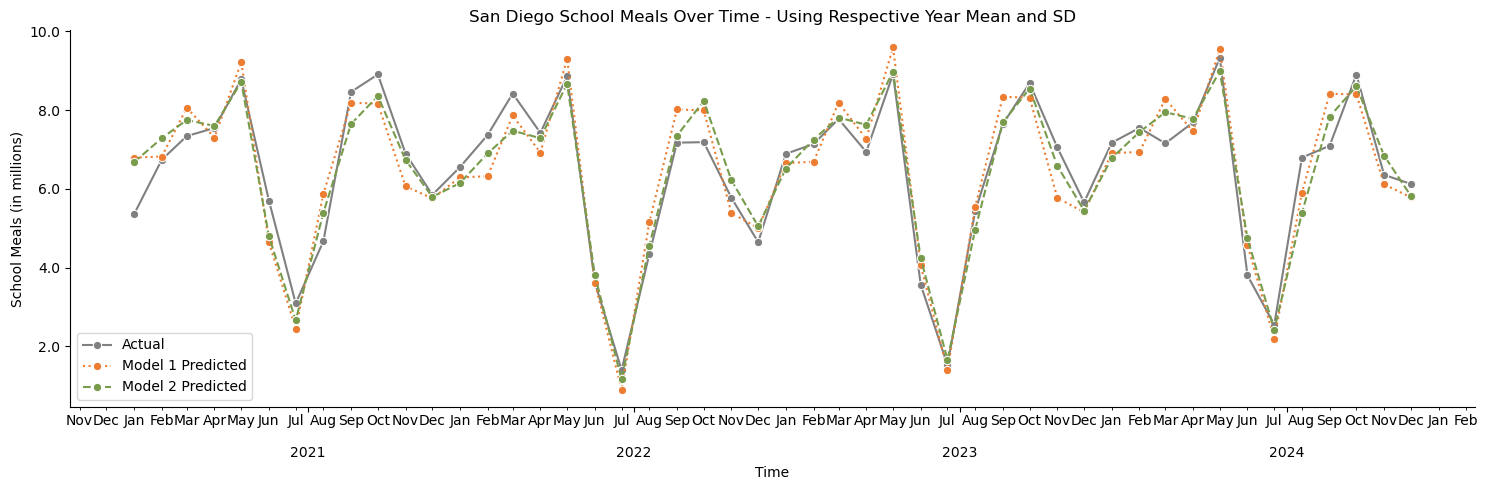

In [88]:
plt.figure(figsize=(15, 5))
ax = plt.gca()

# Actual school meals
sns.lineplot(
    x='date', y='totalschoolmeals',
    data=baseline_mse_school_meals,
    marker='o',
    color = 'gray',
    label='Actual')

# Predicted school meals
sns.lineplot(
    x='date', y='one_z_pred_meals',
    data=baseline_mse_school_meals,
    marker='o',
    color = '#ed7d31',
    linestyle=':',
    label='Model 1 Predicted')

sns.lineplot(
    x='date', y='average_z_pred_meals',
    data=baseline_mse_school_meals,
    marker='o',
    color = '#789C4B',
    linestyle='--',
    label='Model 2 Predicted')

ax.set_title('San Diego School Meals Over Time - Using Respective Year Mean and SD')
ax.set_xlabel('Time')
ax.set_ylabel('School Meals (in millions)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: (x/1000000)))

# major ticks = years
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.tick_params(axis='x', which='major', pad=25)

# minor ticks = months
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

#### Scenario 1: Using the Previous Year's Mean and SD 

The first practical scenario for the mean and standard deviation we tested was using the previous year's mean and standard deviation. For example, using 2021's mean and standard deviation for 2022's predictions. 

In [89]:
previous_mse_school_meals = school_meals[(school_meals['year'] >= 2021)].copy()
year_after = school_meals[(school_meals['year'] >= 2022)].copy()
years = [2021, 2022, 2023]
one_predicted_meals = []
avg_predicted_meals = []

for year in years:
    # Calculate the mean and standard deviation for a given year
    temp_year = school_meals[(school_meals['year'] == year)]
    temp_mean = temp_year['totalschoolmeals'].mean()
    temp_std = temp_year['totalschoolmeals'].std()
    # Get year's predictions using specific mean and standard deviation
    one_year_predictions = list(school_meal_one_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], temp_mean, temp_std).values())
    one_predicted_meals.extend(one_year_predictions)
    
    avg_year_predictions = list(school_meal_average_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], temp_mean, temp_std).values())
    avg_predicted_meals.extend(avg_year_predictions)
    
year_after['one_z_pred_meals'] = one_predicted_meals
year_after['avg_z_pred_meals'] = avg_predicted_meals

one_z_mse = round(((year_after['totalschoolmeals'] - year_after['one_z_pred_meals'])**2).mean(), 2)
one_z_rmse = round(np.sqrt(one_z_mse), 2)
avg_z_mse = round(((year_after['totalschoolmeals'] - year_after['avg_z_pred_meals'])**2).mean(), 2)
avg_z_rmse = round(np.sqrt(avg_z_mse), 2)

print('Scenario 1: Previous Year Mean and SD:')
print('\n')
print('One Z-score Model MSE: ' + str(one_z_mse))
print('One Z-score Model RMSE: ' + str(one_z_rmse))
print('Average Z-score Model MSE: ' + str(avg_z_mse))
print('Average Z-score Model RMSE: ' + str(avg_z_rmse))

Scenario 1: Previous Year Mean and SD:


One Z-score Model MSE: 609563830864.81
One Z-score Model RMSE: 780745.69
Average Z-score Model MSE: 501724902554.75
Average Z-score Model RMSE: 708325.42


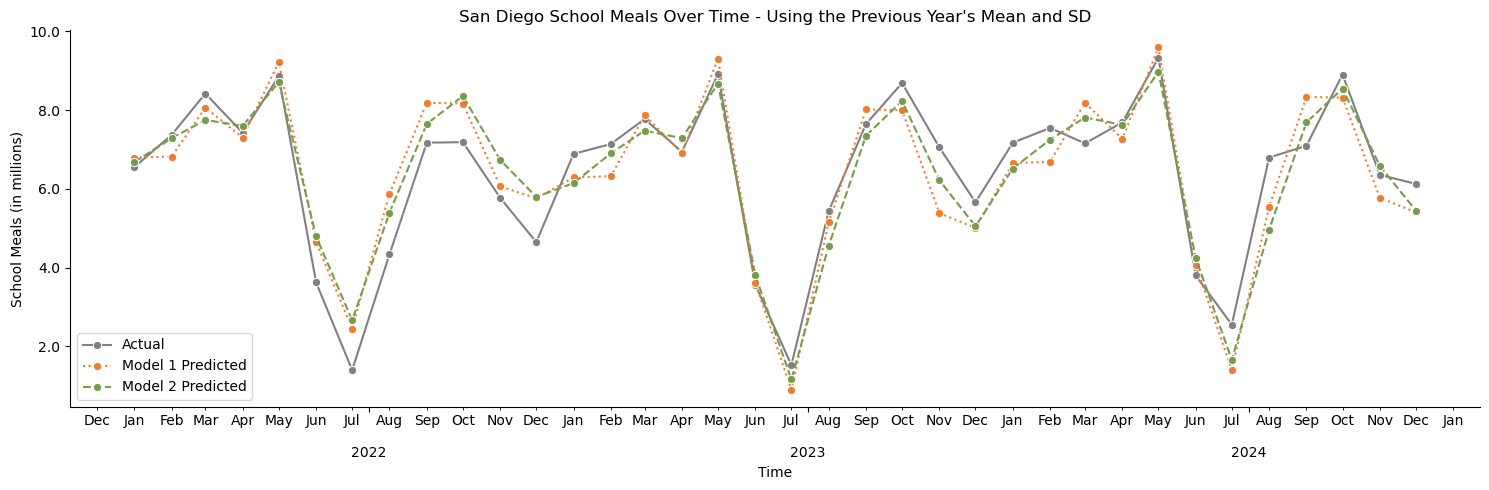

In [90]:
plt.figure(figsize=(15, 5))
ax = plt.gca()

# Actual school meals
sns.lineplot(
    x='date', y='totalschoolmeals',
    data=year_after,
    marker='o',
    color = 'gray',
    label='Actual')

# Predicted school meals
sns.lineplot(
    x='date', y='one_z_pred_meals',
    data=year_after,
    marker='o',
    color = '#ed7d31',
    linestyle=':',
    label='Model 1 Predicted')

sns.lineplot(
    x='date', y='avg_z_pred_meals',
    data=year_after,
    marker='o',
    color = '#789C4B',
    linestyle='--',
    label='Model 2 Predicted')

ax.set_title("San Diego School Meals Over Time - Using the Previous Year's Mean and SD")
ax.set_xlabel('Time')
ax.set_ylabel('School Meals (in millions)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: (x/1000000)))

# major ticks = years
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.tick_params(axis='x', which='major', pad=25)

# minor ticks = months
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

#### Scenario 2: Using 2021-2024's Mean and and SD
The second practical scenario for the mean and standard deviation we tested was using all monthly school meals across 2021-2024 to compute their mean and standard deviation. For example, using 2021-2024's mean and standard deviation for 2021's predictions.

In [91]:
all_mse_school_meals = school_meals[(school_meals['year'] >= 2021)].copy()
years = [2021, 2022, 2023, 2024]
one_predicted_meals = []
avg_predicted_meals = []

for year in years:
    one_year_predictions = list(school_meal_one_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).values())
    one_predicted_meals.extend(one_year_predictions)
    avg_year_prediction = list(school_meal_average_per_month([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).values())
    avg_predicted_meals.extend(avg_year_predictions)
    
all_mse_school_meals['one_z_pred_meals'] = one_predicted_meals
all_mse_school_meals['avg_z_pred_meals'] = avg_predicted_meals

one_z_mse = round(((all_mse_school_meals['totalschoolmeals'] - all_mse_school_meals['one_z_pred_meals'])**2).mean(), 2)
one_z_rmse = round(np.sqrt(one_z_mse), 2)
avg_z_mse = round(((all_mse_school_meals['totalschoolmeals'] - all_mse_school_meals['avg_z_pred_meals'])**2).mean(), 2)
avg_z_rmse = round(np.sqrt(avg_z_mse), 2)

print('Scenario 2: 2021-2024 Mean and SD:')
print('\n')
print('One Z-score Model MSE: ' + str(one_z_mse))
print('One Z-score Model RMSE: ' + str(one_z_rmse))
print('Average Z-score Model MSE: ' + str(avg_z_mse))
print('Average Z-score Model RMSE: ' + str(avg_z_rmse))

Scenario 2: 2021-2024 Mean and SD:


One Z-score Model MSE: 516350651104.67
One Z-score Model RMSE: 718575.43
Average Z-score Model MSE: 413192349316.96
Average Z-score Model RMSE: 642800.4


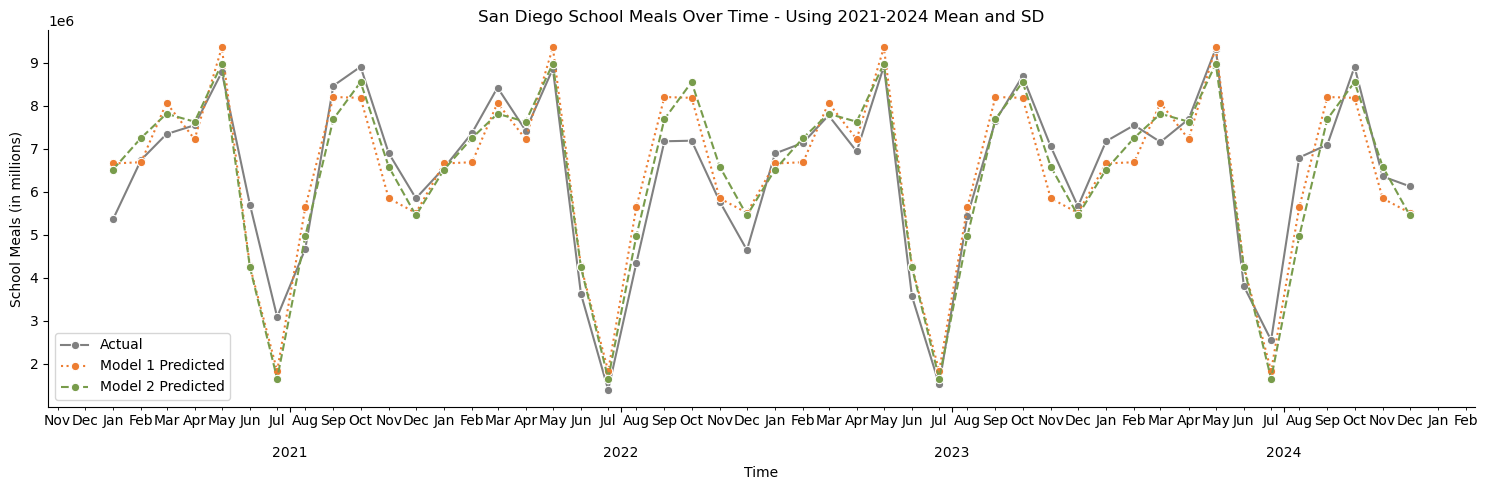

In [92]:
plt.figure(figsize=(15, 5))
ax = plt.gca()

# Actual school meals
sns.lineplot(
    x='date', y='totalschoolmeals',
    data=all_mse_school_meals,
    marker='o',
    color = 'gray',
    label='Actual'
)

# Predicted school meals
sns.lineplot(
    x='date', y='one_z_pred_meals',
    data=all_mse_school_meals,
    marker='o',
    color = '#ed7d31',
    linestyle=':',
    label='Model 1 Predicted')

sns.lineplot(
    x='date', y='avg_z_pred_meals',
    data=all_mse_school_meals,
    marker='o',
    color = '#789C4B',
    linestyle='--',
    label='Model 2 Predicted')

ax.set_title('San Diego School Meals Over Time - Using 2021-2024 Mean and SD')
ax.set_xlabel('Time')
ax.set_ylabel('School Meals (in millions)')

# major ticks = years
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.tick_params(axis='x', which='major', pad=25)

# minor ticks = months
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

### Performance Summary:

The table below provides a summary of each model's RMSE in each scenario described above. It becomes clear that Model 2, the averaged z-score per month, performs better than Model 1 on the available data. Regardless of the scenario, Model 2 has lower RMSE values. In regards to which mean and standard deviation to use, Scenario 2 (2021-2024's mean and standard deviation) leads to a better RMSE than Scenario 1. Additionally, Model 2 using Scenario 2's Mean/SD yields a lower RMSE than Model 1's baseline, suggesting that practically, Model 2 will perform better than Model 1, even when Model 1 has "more information."


| Mean/SD                                 | Model 1: One Z-score  | Model 2: Average Z-score |
| --------------------------------------- | --------------------- | ------------------------ |
| **Baseline:** Respective Year's Mean/SD |       656737.88       |         540,895.58       |
| **Scenario 1:** Previous Year's Mean/SD |       780,745.69      |         708,325.42       |
| **Scenario 2:** 2021-2024 Mean/SD       |       718,575.43      |       **642,800.40**     |

Thus, with these metrics, we argue that in general, Model 2 with 2021-2024's mean and standard deviation should be used to generate predictions for total school meals for Q1 of 2025.


---

# 5. Discussion and Conclusion

Our project successfully calculated a new FPL of 225% to define nutrition insecurity in San Diego Country to update SDHC's methodology.

In regards to predictive models, our first model, the multiple linear regression, developed to predict CalFresh allotments in California showed how there is an upward trend in allotments over time. To reflect shifts in the data from policy motions, we introduced dummy variables in our second multiple linear regression. Although we did see improved model accuracy, the regression model did not see improvement in the low Durbin-Watson statistics. The errors in the prediction were autocorrelated which suggests that the model does not do well in short term predictions with sudden spikes/drops and would better suit long term growth predictions. 

Additionally, we successfully developed two models to analyze total school meal distributions. The first, an ordinal piecewise model, offers valuable insights into whether the number of meals provided differs significantly from previous months or years. The second, a Discrete Cosine Transform (DCT) model, demonstrates strong predictive accuracy on in-sample data and is particularly well-suited for forecasting purposes. The San Diego Hunger Coalition plans to implement this model to streamline their operations and reduce reporting delays by approximately three months.

Overall, this project resulted in executable codes, data frames, and statistical models in ready to use Python functions that the SDHC can use and integrate into their methdologies effectively and efficiently. A fully detailed list is avaliable in the Appendix.

## 5.1 Limitations

While our research and predictive models provide a strong foundation for improving food assistance engagement and forecasting, there are several limitations that should be noted. One of the most significant limitations we faced was the lack of data availability. For our school meals data, we were only able to train our models on four full years worth of data, summing to 48 total datapoints. It is also important to note that most of these years' data are largely impacted by the COVID-19 pandemic and its effects on food assistance programs. This limited our ability to capture long-term data trends and improve the DCT Models' predictive accuracy. Furthermore, as previously discussed, it is unclear how well the DCT Model's perform out of sample due to the lack of data; quarter 1 data will become avaliable after this project has concluded. 

Additionally, our analysis relies on data that may be prone to reporting inconsistencies and missing values that can vary by school, program, and year. This could impact the quality of the data our models are built upon, and can affect the prediction accuacy and applicability of our models to future data. Further, factors such as COVID-19 impacts, school closures, and potential program eligibility changes were not directly captured in the modeling. 

The predictive model for CalFresh faced similar limitations, with only three years worth of data to work on. This is a realtively small sample for a time series analysis model, such as ARIMA, that requires a sufficient amount of data to detect patterns in the lags through estimates of autoregressive, moving average, and seasonal components.

In response to feedback, an ARIMA model with drift was added to the appendix. The ARIMA model's high RMSE compared to the original regression model suggests limited predictive performance. This may be due to the small sample size and demonstrated lack of autocorrelation in the data. In addition to the ARIMA model, a linear regression model that accounts for seasonality was generated using year specific quarters as categorical variables. While this model showed the best predictive accuracy, the trade-off is that individual months become less interpretable - especially in months where there are emergency allotments.

Furthermore, when taking into account the unpredictability of natural disasters or political events, linear models are not able capture these spikes or drops in data. The approach to capturing these events are simplified as dummy variables which may not be the best approach as we do not fully capture the potential prolonged effects it may have over time.


## 5.2 Future Areas of Research

Future work can build upon the FPL research and food assistance models we developed, especially by integrating more training data to improve the quality of our models. In particular, training the DCT model on additional years' data will improve the model's accuracy. Expanding upon our training data is essential in developing robust models that can learn from long-term trends, therefore producing more usable predictions. Additionally, analyzing the DCT model's performance on out of sample data is key to gaining a better understanding of how well the model capture's total school meals. Once actual 2025 data becomes avaliable, the mean squared error and/or root mean squared error should be calculated to more objectively evaluate the DCT models' peformance. If the DCT doesn't yield accurate enough predictions, additional models using methods that leverage the data's periodicity, such as a Discrete Fourier Transform, can be developed and tested. 

Further, future models can integrate other variables, allowing a more granular view of the data. For example, including valuable information about zipcode and school level would allow San Diego Hunger Coalition to explore how trends vary between areas and grade levels. This granularity could be included in interactive and informative Tableau or Power BI dashboards to allow a viewer to examine nutrition insecurity data on a zipcode, city, or overall county view. 

The CalFresh Allotment prediction model would also benefit from having additional years of data. The implementation of an ARIMA model with more data points may address the autocorrelation in the data and improve short term forecasting. Additionally, the integration of additional variables, such as demographic data and unemployment rates, would allow for a better understanding of the fluctuations in allotments. For example, it could create an opportunity to explore how economic conditions affects CalFresh usage or funding which in turn may enhance the value of what the model has to offer to policy makers. 

___

# 6. Acknowledgements

This project was made possible through the invaluable support and guidance of Joseph Kendrick, Aram Grigoryan, Will Styler, and Katherine Meckel. We would also like to extend our sincere thanks to the San Diego Hunger Coalition for hosting this project and providing the data that made this analysis possible.

---

# 7. References

<a name="cite_note-1"></a> [1.](#cite_ref-1) San Diego Hunger Coalition. "2024 Annual State of Hunger Issue Brief." San Diego, CA; November 2024.

<a name="cite_note-2"></a> [2.](#cite_ref-2) San Diego Hunger Coalition. "San Diego Hunger Coalition Meal Gap Methodology." San Diego, CA; October 2024.

<a name="cite_note-3"></a> [3.](#cite_ref-3) Massachusetts Institute of Technology. "Living Wage Calculation for San Diego County, California." https://livingwage.mit.edu/counties/06073.

<a name="cite_note-4"></a> [4.](#cite_ref-4) University of Southern California. "Food Insecurity in Los Angeles County, July 2023." September 2023, https://publicexchange.usc.edu/wp-content/uploads/2023/09/FoodInsecurityinLACounty_ResearchBrief_July2023_Final.pdf#page=4.33. 

<a name="cite_note-5"></a> [5.](#cite_ref-5) U.S. Department of Health and Human Services. “Frequently Asked Questions Related to the Poverty Guidelines and Poverty.” Office of the Assistant Secretary for Planning and Evaluation (ASPE), https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/frequently-asked-questions-related-poverty-guidelines-poverty#differences.

<a name="cite_note-6"></a> [6.](#cite_ref-6) U.S. Department of Health and Human Services. “Prior HHS Poverty Guidelines and Federal Register References.” ASPE, https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references.

<a name="cite_note-7"></a> [7.](#cite_ref-7) "Consumer Price Index: Questions and Answers." U.S. Bureau of Labor Statistics, U.S. Department of Labor, https://www.bls.gov/cpi/questions-and-answers.htm. Accessed 5 June 2025.

<a name="cite_note-8"></a> [8.](#cite_ref-8) California Governor’s Office of Emergency Services. “2024 Storms Recovery Resources.” Cal OES News, 1 Mar. 2024, https://news.caloes.ca.gov/2024stormrecovery/.

<a name="cite_note-9"></a> [9.](#cite_ref-9) Legal Services of Northern California. “Benefit Increases Because of COVID-19.” LSNC Guide to CalFresh Benefits, https://calfresh.guide/benefit-increase-because-of-covid-19/.

<a name="cite_note-10"></a> [10.](#cite_ref-10) "Discrete Cosine Transformations." DataGenetics, 3 Nov. 2012, http://datagenetics.com/blog/november32012/index.html.

# 8. Appendix

## 8.1: Summary of Key Deliverables to SDHC

- **Cleaned 2022-2024 CalFresh Allotments DataFrame:** `totals22_24`, provided to SDHC as `calfresh_2022_2024`
- **Multiple linear regression:** `model_1`, ready to use
- **Multiple Linear Regression with Emergency Allotment w/Dummy Variables:** `model_2`, ready to use
- **ARIMA:** `model_arima`, ready to use but ideally needs additional data
- **Multiple Linear Regression w/ Quarter Dummies:** `model_quarter`, ready to use but ideally needs additional data
### School Meals
- **Cleaned 2021-2024 School Meal DataFrame:** `school_meals`, provided to SDHC as `school_meals_2021_2024.csv`
- **School Meals Ordinal Piecewise Functions**: Can be ran as needed to explore relationships from month to month
    1. Function 1: `pw_model_individual`, use this to plot a separate piecewise regression function for each year on individual plots 
    2. Function 2: `pw_model_stacked`, use this to plot piecewise regression functions for multiple years on a single, stacked plot for comparison**
- **DCT School Meal Functions**: Ready to use for 2025 predictions; should be updated and tested yearly
    1. Model 1: `school_meal_one_per_month`
    2. Model 2: `school_meal_average_per_month`


## Additional Model Testing

## 8.2 ARIMA Model
---
#### Check for stationarity and perform differencing if necessary:

Data has to be stationary, the Augmented Dickey-Fuller test is used to see if the data has a constant mean and variance, and put numbers to it. 

In [93]:
from statsmodels.tsa.stattools import adfuller

# creating a copy of the original df
arimatotals22_24 = totals22_24.copy()

result_original = adfuller(arimatotals22_24["CountyTotal"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")


ADF Statistic (Original): -1.1130
p-value (Original): 0.7099
Interpretation: The original series is Non-Stationary.



To perform differencing, we subtract each observation from the previous one to give us a new time series of first differences.

In [94]:
# Apply first-order differencing
arimatotals22_24['CountyTotal_Diff'] = arimatotals22_24['CountyTotal'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(arimatotals22_24["CountyTotal_Diff"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

ADF Statistic (Differenced): -4.1338
p-value (Differenced): 0.0009
Interpretation: The differenced series is Stationary.


---
#### Plotting Differenced County Total Allotments Over Time

Plot is showing how much CalFresh Allotment totals are changing from month to month. It captures the spikes in emergency allotment months.

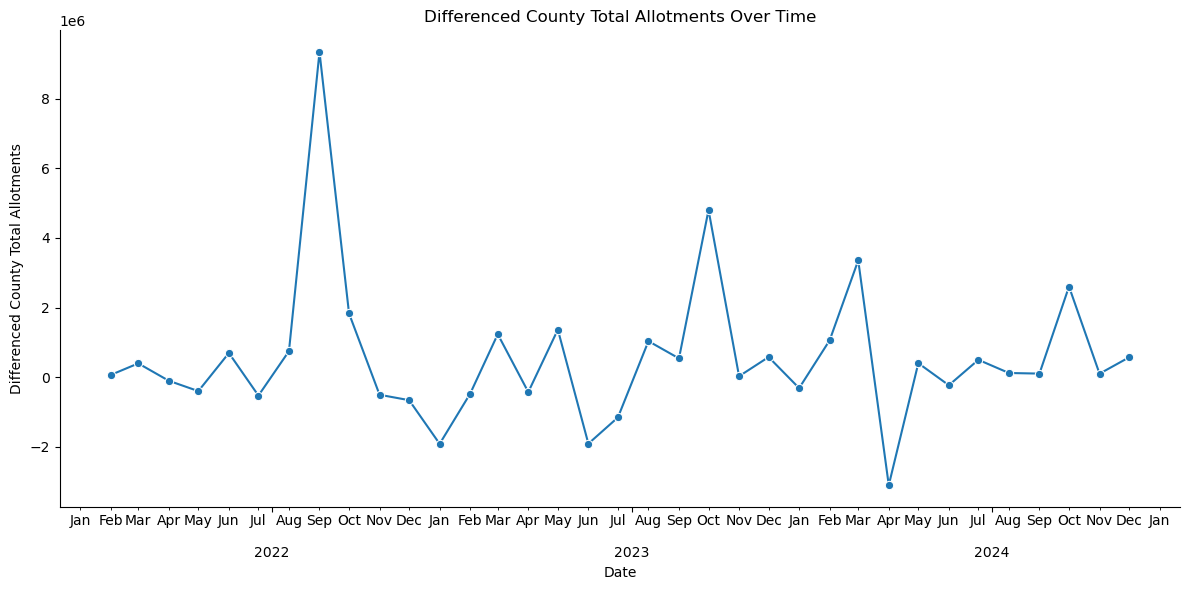

In [95]:
# Plotting the differenced County Total Allotments
plt.figure(figsize=(12, 6))

# Creating a line plot: Credit to Amy for code block
ax = sns.lineplot(x='Date', y='CountyTotal_Diff', data= arimatotals22_24, marker='o')
ax.set_title('Differenced County Total Allotments Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Differenced County Total Allotments')

# Uncomment line below for y-axis in millions
#ax.ticklabel_format(style='plain', axis='y')  

# Setting respective years on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(month=7, day = 15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', pad=25) # space between years and months

# Setting respective months on x-axis
ax.xaxis.set_minor_locator(mdates.MonthLocator())  
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) 


sns.despine() 
plt.tight_layout()

---
#### Model identification

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) is used to deterime values of p, d, and q. 

- Where "p" is the number of lagged observations. 
- Where "d" refers to the order of differencing.
- Where "q" refers to the order of the moving average (MA) part of the model.

For our data, we choose 1 for both p and q because we see a significant spike in the first lag for each.

/Users/adeline/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


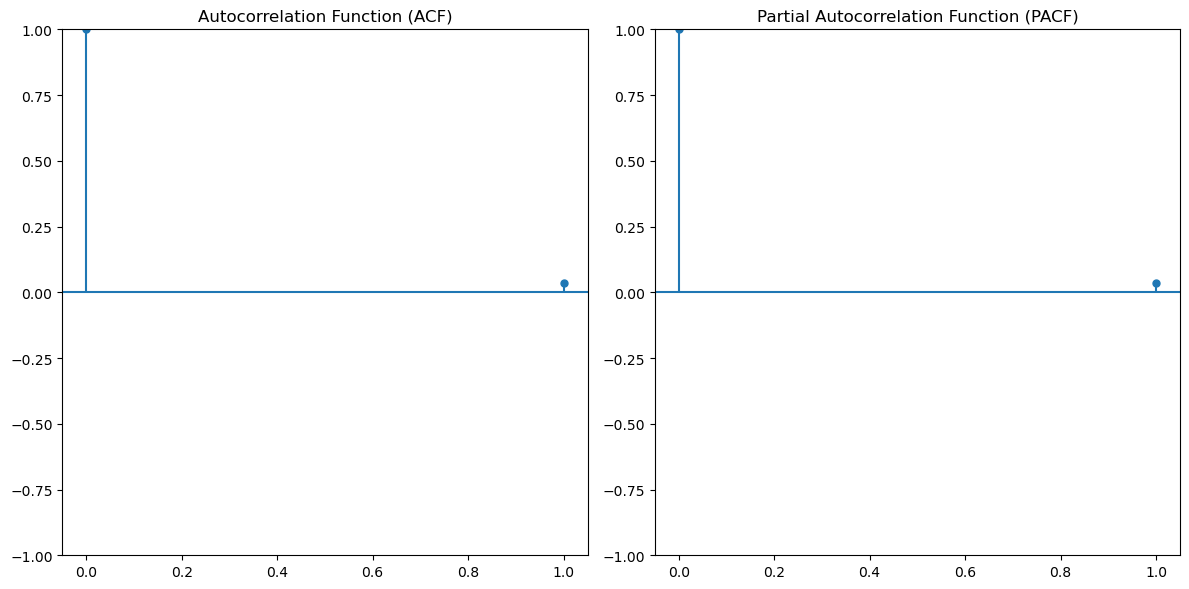

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ACF plot
plot_acf(arimatotals22_24['CountyTotal_Diff'].dropna(), lags=1, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(arimatotals22_24['CountyTotal_Diff'].dropna(), lags=1, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

---
#### Forecasting

We use the fitted model to predict future values based on the data. We then visualize predictions by plotting the predicted values alongside the actual values.

In [97]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test
train_size = int(len(arimatotals22_24) * 0.8)
train, test = arimatotals22_24.iloc[:train_size], arimatotals22_24.iloc[train_size:]

# Fit ARIMA model
model_arima = ARIMA(train["CountyTotal"], order=(1,1,1),trend='t')
model_arima_fit = model_arima.fit()

In [98]:
print("Train dates:", train["Date"].min(), "to", train["Date"].max())
print("Test dates:", test["Date"].min(), "to", test["Date"].max())

Train dates: 2022-01-01 00:00:00 to 2024-04-01 00:00:00
Test dates: 2024-05-01 00:00:00 to 2024-12-01 00:00:00


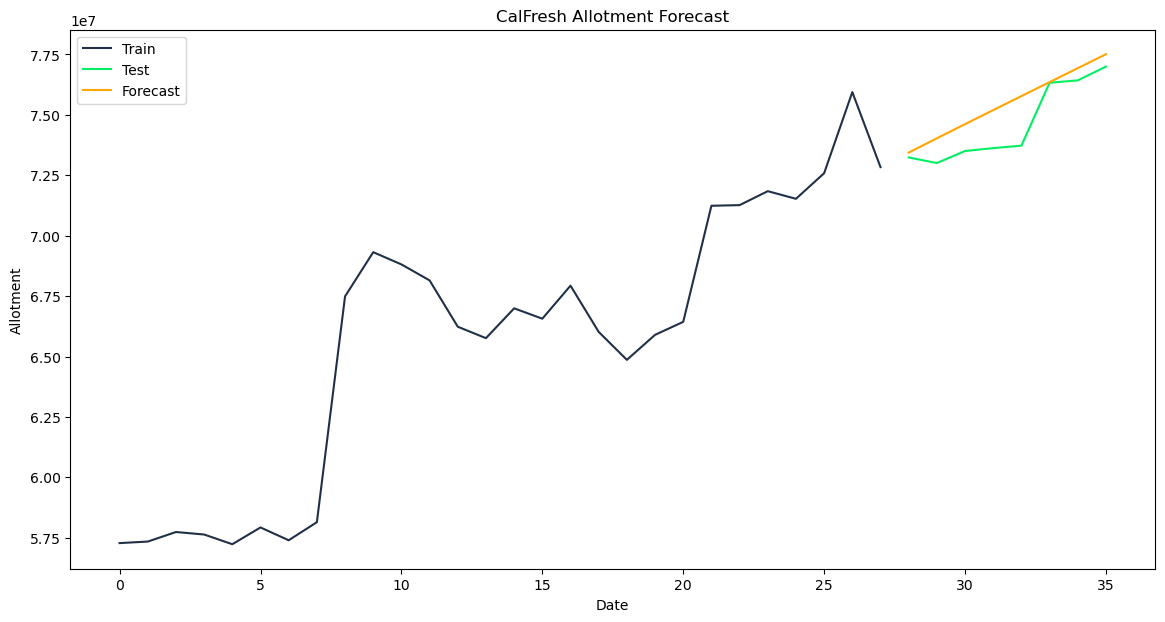

In [99]:
# Forecast
forecast = model_arima_fit.forecast(steps=len(test))
forecast.index = test["Date"].values 

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["CountyTotal"], label='Train', color='#203147')
plt.plot(test.index, test["CountyTotal"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('CalFresh Allotment Forecast')
plt.xlabel('Date')
plt.ylabel('Allotment')
plt.legend()
plt.show()

---
#### Evaluating ARIMA Model Statistics

Lower values mean the model fits better.

In [100]:
print(f"AIC: {model_arima_fit.aic}")
print(f"BIC: {model_arima_fit.bic}")

AIC: 875.8359413070414
BIC: 881.0192887710587


A lower RMSE indicates a better ARIMA model, reflecting smaller differences between actual and predicted values, and it's on the scale of the data.

In [101]:
from sklearn.metrics import mean_squared_error

forecast = forecast[:len(test)]
test_close = test["CountyTotal"][:len(forecast)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_close, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 1091056.0138


---
#### Linear Regression Model Statistics`

In [102]:
# Split the data (same as ARIMA)
train_size = int(len(totals22_24) * 0.8)
reg_train = totals22_24.iloc[:train_size]
reg_test = totals22_24.iloc[train_size:]

# Predict on test set
reg_preds = model_2.predict(reg_test)

In [103]:
reg_rmse = np.sqrt(mean_squared_error(reg_test["CountyTotal"], reg_preds))
print(f"Linear Regression RMSE: {reg_rmse:.2f}")

Linear Regression RMSE: 924008.77


---
## 8.3 Multiple Linear Regression w/ Quarter Dummies`

In [104]:
# creating a copy of the df
totals22_24_q = totals22_24.copy()

# Extracting quarters
#totals22_24_q["quarter_label"] = (
    #totals22_24_q["Date"].dt.year.astype(str) + "_Q" + totals22_24_q["Date"].dt.quarter.astype(str))

# Extract quarter in the format '2022Q1', '2023Q2'
totals22_24_q["quarter"] = totals22_24_q["Date"].dt.to_period("Q").astype(str)

model_quarter = smf.ols( data = totals22_24_q, formula = "CountyTotal ~ C(quarter) + year + emergency_allotments + covid_end").fit()

model_quarter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CountyTotal   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     134.2
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           7.79e-18
Time:                        16:01:08   Log-Likelihood:                -535.67
No. Observations:                  36   AIC:                             1099.
Df Residuals:                      22   BIC:                             1122.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.362e+04   3298.335    -25.351      0.000   -9.05e+04   -7.68e+04
C(quarter)[T.2022Q2]  1.443e+05   7.33e+05      0.197      0.846   -1.38e+06    1.66e+06
C(quarter)[T.2022Q3]  1.289e+06   7.77e+05      1.659      0.111   -3.22e+05     2.9e+06
C(quarter)[T.2022Q4]  1.131e+07   7.33e+05     15.433      0.000    9.79e+06    1.28e+07
C(quarter)[T.2023Q1]  8.847e+06   7.33e+05     12.073      0.000    7.33e+06    1.04e+07
C(quarter)[T.2023Q2]  9.494e+06   8.19e+05     11.588      0.000    7.79e+06    1.12e+07
C(quarter)[T.2023Q3]   8.25e+06   7.33e+05     11.258      0.000    6.73e+06    9.77e+06
C(quarter)[T.2023Q4]  1.397e+07   7.33e+05     19.060      0.000    1.24e+07    1.55e+07
C(quarter)[T.2024Q1]  1.357e+07   7.77e+05     17.461      0.000     1.2e+07    1.52e+07
C(quarter)[T.2024Q2]  1.552e+07   7.33e+05     21.170      0.000     1.4e+07     1.7e+07
C(quarter)[T.2024Q3]  1.611e+07   7.33e+05     21.976      0.000    1.46e+07    1.76e+07
C(quarter)[T.2024Q4]  1.907e+07   7.33e+05     26.023      0.000    1.76e+07    2.06e+07
year                  2.846e+04    254.674    111.732      0.000    2.79e+04     2.9e+04
emergency_allotments  6.801e+06   7.77e+05      8.753      0.000    5.19e+06    8.41e+06
covid_end            -4.101e+05    1.1e+06     -0.373      0.713   -2.69e+06    1.87e+06
==============================================================================
Omnibus:                        4.175   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.937
Skew:                           0.054   Prob(JB):                        0.140
Kurtosis:                       4.616   Cond. No.                     4.46e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.41e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [105]:
# Predict on last 20% of data
train_size = int(len(totals22_24_q) * 0.8)
q_train = totals22_24_q.iloc[:train_size]
q_test = totals22_24_q.iloc[train_size:]
    
# Predict
quarter_preds = model_quarter.predict(q_test)

# RMSE
rmse_quarter = np.sqrt(mean_squared_error(q_test["CountyTotal"], quarter_preds))
print(f"Quarter-based Regression RMSE: {rmse_quarter:.2f}")


#Quarter-based Regression RMSE: 1547586.52
#Quarter-based Regression RMSE: 203078.71

Quarter-based Regression RMSE: 203078.71


Looking at RMSE for all models, quarter based regression seems to be preforming best.

* Quarter-based Regression RMSE: 203078.71

    AIC: 1099
* Linear Regression RMSE: 924008.77
  
    AIC: 1163
* ARIMA RMSE: 1091056.0138

    AIC: 876